# **Week 10 notebook**

### **Exam 2007 problem 8**

<img src="SymPyBilleder/2025-11-10-10-01-21.png" width="550">

##### **Question 8.1**

<img src="SymPyBilleder/2025-11-10-15-55-08.png" width="550">

**Answer:**

In [136]:
tobacco <- data.frame(Y = c(0.11,0.68,0.00,0.11,0.77,1.01,1.40,1.15,0.51,0.34,0.89,0.92,1.33,0.26,0.23),
                      X1 = c(4.22,3.77,3.54,3.78,3.10,2.78,2.67,3.03,4.12,3.94,2.93,3.17,2.61,3.13,2.94),
                      X2 = c(1.35,0.23,0.76,0.39,0.64,0.64,0.90,0.97,0.62,0.45,0.25,0.20,0.20,1.48,2.22),
                      X3 = c(4.86,4.42,2.76,3.23,6.16,4.62,5.59,6.60,5.31,4.45,3.38,3.08,3.64,4.28,4.58))

length(tobacco$Y)

[1] 15

This question asks for total sum of squares, NOT the usual sum of squared where we do:
```
SSR <- sum(residuals(full_model)^2)
SSR
```

Because this is the error between the predicted values and the actual values. The quesiton asks for the regression sum of squares:
$$
SSR = \sum_{i=1}^{n} (\hat{Y}_i - \bar{Y})^2
$$
Meanwhile the code above gives the residual sum of squares:
$$
SSE = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$
So instead we write the code below.

In [132]:
SST <- sum((tobacco$Y - mean(tobacco$Y))^2)
SST

[1] 3.000093

In [141]:
# Or you can do this:
AnoT <- anova(lm(Y ~ ., data = tobacco))
sum(AnoT$`Sum Sq`)

[1] 3.000093

**The answer is, therefore, option 3.**

##### **Question 8.2**

<img src="SymPyBilleder/2025-11-10-15-59-11.png" width="550">

**Answer:**

We have to find at what level the coefficient for $X3$ is significant.

In [33]:
summary(full_model)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = tobacco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38672 -0.09651  0.01928  0.14003  0.21453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.14539    0.39661   5.409 0.000214 ***
X1          -0.60458    0.09726  -6.216 6.56e-05 ***
X2          -0.46762    0.09627  -4.858 0.000505 ***
X3           0.19234    0.04841   3.973 0.002183 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.194 on 11 degrees of freedom
Multiple R-squared:  0.862,	Adjusted R-squared:  0.8244 
F-statistic:  22.9 on 3 and 11 DF,  p-value: 4.93e-05


Here, we see that $X3$ has a $p$-value of $0.002183$ so we see that at level $0.005$ it is still significant, but NOT at level $0.001$.

**The answer is, therefore, option 4.**

##### **Question 8.3**

<img src="SymPyBilleder/2025-11-10-15-59-21.png" width="550">

**Answer:**


In [34]:
summary(full_model)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = tobacco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38672 -0.09651  0.01928  0.14003  0.21453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.14539    0.39661   5.409 0.000214 ***
X1          -0.60458    0.09726  -6.216 6.56e-05 ***
X2          -0.46762    0.09627  -4.858 0.000505 ***
X3           0.19234    0.04841   3.973 0.002183 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.194 on 11 degrees of freedom
Multiple R-squared:  0.862,	Adjusted R-squared:  0.8244 
F-statistic:  22.9 on 3 and 11 DF,  p-value: 4.93e-05


In [35]:
# assuming your model is full_model
dfb <- dfbetas(full_model)              # matrix: one column per coef
which.max(abs(dfb[, "X1"]))             # returns the observation index most influential on X1
# optional: show the top few
order_idx <- order(-abs(dfb[, "X1"]))
cbind(idx = order_idx, dfb_x1 = dfb[order_idx, "X1"])[1:5, ]

1 
1

,idx,dfb_x1
1,1,0.8535835
7,7,-0.4559825
13,13,-0.4222843
9,9,0.3638715
5,5,0.3312128


So the top most influencial is observation number 1.

**The answer is, thus, option 1.**

##### **Question 8.4**

<img src="SymPyBilleder/2025-11-10-15-59-34.png" width="550">

**Answer:**

Here we want to investigate which makes $\beta_1 = \beta_2 = \beta_3 = 0$ and we have to look at our $F$-statistic for the full model.

In [36]:
summary(full_model)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = tobacco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38672 -0.09651  0.01928  0.14003  0.21453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.14539    0.39661   5.409 0.000214 ***
X1          -0.60458    0.09726  -6.216 6.56e-05 ***
X2          -0.46762    0.09627  -4.858 0.000505 ***
X3           0.19234    0.04841   3.973 0.002183 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.194 on 11 degrees of freedom
Multiple R-squared:  0.862,	Adjusted R-squared:  0.8244 
F-statistic:  22.9 on 3 and 11 DF,  p-value: 4.93e-05


That $F$-statistic tests exactly the hypothesis that all three slope coefficients $= 0$ simultaneously. So we see $22.9$.

**Hence, the answer is option 1.**

##### **Question 8.5**

<img src="SymPyBilleder/2025-11-10-15-59-45.png" width="550">

**Answer:**

We know the confidence interval formula from the book is:
$$
[u+t(n-k)_{1-\frac{\alpha}{2}}s\sqrt{c}, u+t(n-k)_{\frac{\alpha}{2}}s\sqrt{c}]
$$
Here, $n$ is the number of observations and $k$ is the number of parameters (with intercept), so from here we already know that inside $t(n-k)$ we have to have $n-k-1 = 15 - 3-1 = 11$ degrees of freedom (can also just be read from the summary output).

In [41]:
# We do t-test on 11 degrees of freedom:
qt(0.975, df = 11)

[1] 2.200985

NOTE, we have $0.975$ in the quantile because we follow $1-\frac{\alpha}{2}$ where $\alpha = 0.05$ for a $95\%$ confidence interval.

Furthermore, we have $\sqrt{c}$ which is the square root of variance estimated at $0.01$, so $\sqrt{0.01} = 0.1$, therefore, it should look something like:
$$
[0.7 -2.201 * 0.1, 0.7 + 2.201 * 0.1]
$$
**The answer is, thus, option 2.**

##### **Question 8.6**

<img src="SymPyBilleder/2025-11-10-15-59-57.png" width="550">

**Answer:**

Answer is $Z5$ as that one is the only one with like an actual linear trend. This trend means that $Z5$ systematically increase with residuals, aka, it has some predictive power left for $Y$ that our current model may have missed.

GENERAL RULE OF THUMB: if residuals of fitted variables are random = good fit, if residuals show trend = bad fit because model misspecified. Meanwhile, residuals of new variables when they are random = irrelevant variable, when they show trend = relevant variable that have predictive power left.

**The answer is, thus, option 5.**

Teacher wrote something similar like Z5 is the only one that exhibit the same trend as the residuals which is rising, so by including that, we should be able to model this trend in the data and, thus, reduce the variance in our model.

### **Exam 2008 problem 3**

<img src="SymPyBilleder/2025-11-10-23-38-08.png" width="550">

In [142]:
LSA <- data.frame("Location" = c("OI","OI","OI","OI","OI","OI","OI","OI","OI","OI","OI","OI","OI","OI","OI","SI","SI","SI","SI","SI","SI","SI","SI","SI","SI","SI","SI","SI","SI","SI","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM"),
                  "Type" = c("DVEG","DVEG","DVEG","DVEG","DVEG","SHRT","SHRT","SHRT","SHRT","SHRT","TALL","TALL","TALL","TALL","TALL","DVEG","DVEG","DVEG","DVEG","DVEG","SHRT","SHRT","SHRT","SHRT","SHRT","TALL","TALL","TALL","TALL","TALL","DVEG","DVEG","DVEG","DVEG","DVEG","SHRT","SHRT","SHRT","SHRT","SHRT","TALL","TALL","TALL","TALL","TALL"),
                  "Biomass" = c(676,516,1052,868,1008,436,544,680,640,492,984,1400,1276,1736,1004,396,352,328,392,236,392,268,252,236,340,2436,2216,2096,1660,2272,824,1196,1960,2080,1764,412,416,504,492,636,1756,1232,1400,1620,1560),
                  "Salinity" = c(33,35,32,30,33,33,36,30,38,30,30,37,33,36,30,30,27,29,34,36,30,28,31,31,35,29,35,35,30,30,26,29,25,26,26,25,26,26,27,27,24,27,26,28,28),
                  "pH" = c(5.00,4.75,4.20,4.40,5.55,5.05,4.25,4.45,4.75,4.60,4.10,3.45,3.45,4.10,3.50,3.25,3.35,3.20,3.35,3.30,3.25,3.25,3.20,3.20,3.35,7.10,7.35,7.45,7.45,7.40,4.85,4.60,5.20,4.75,5.20,4.55,3.95,3.70,3.75,4.15,5.60,5.35,5.50,5.50,5.40),
                  "K" = c(1441.67,1299.19,1154.27,1045.15,521.62,1273.02,1346.35,1253.88,1242.65,1281.95,553.69,494.74,525.97,571.14,408.64,646.65,14.03,350.73,496.29,580.92,535.82,490.34,552.39,661.32,672.15,528.65,563.13,497.96,458.38,498.25,936.26,894.79,941.36,1038.79,898.05,989.87,951.28,939.83,925.42,954.11,720.72,782.09,773.30,829.26,856.96),
                  "Na" = c(35184.5,28170.4,26455.0,25072.9,31664.2,25491.7,20877.3,25621.3,27587.3,26511.7,7886.5,14596.0,9826.8,11978.4,10368.6,17307.4,12822.0,8582.6,12369.5,14731.9,15060.6,11056.3,8118.9,13009.5,15003.7,10225.0,8024.2,10393.0,8711.6,10239.6,20436.0,12519.9,18979.0,22986.1,11704.5,17721.0,16485.2,17101.3,17849.0,16949.6,11344.6,14752.4,13649.8,14533.0,16892.2),
                  "Zn" = c(16.4524,13.9852,15.3276,17.3128,22.3312,12.2778,17.8225,14.3516,13.6826,11.7566,9.8820,16.6752,12.3730,9.4058,14.9302,31.2865,30.1652,28.5901,19.8795,18.5056,22.1344,28.6101,23.1908,24.6917,22.6758,0.3729,0.2703,0.3205,0.2648,0.2105,18.9875,20.9687,23.9841,19.9727,21.3864,23.7063,30.5589,26.8415,27.7292,21.5699,19.6531,20.3295,19.5880,20.1328,19.2420))

##### **Question 3.1**

<img src="SymPyBilleder/2025-11-10-23-38-27.png" width="550">

**Answer:**

In [143]:
# First we build out model:
M1 <- lm(Biomass ~ pH + Na, data = LSA)
summary(M1)


Call:
lm(formula = Biomass ~ pH + Na, data = LSA)

Residuals:
    Min      1Q  Median      3Q     Max 
-677.93 -229.76  -97.47  207.51 1168.40 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.757e+02  2.735e+02  -1.739   0.0893 .  
pH           4.049e+02  4.777e+01   8.477 1.22e-10 ***
Na          -2.333e-02  8.655e-03  -2.695   0.0101 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 394.9 on 42 degrees of freedom
Multiple R-squared:  0.6584,	Adjusted R-squared:  0.6422 
F-statistic: 40.48 on 2 and 42 DF,  p-value: 1.596e-10


We see that the ouput gives the intercept the value of $-475.7$.

**The answer is, therefore, option 1.**

In [ ]:
# ONE could also do 
SuM1 = summary(M1)
SuM1$coefficients[1]

##### **Question 3.2**

<img src="SymPyBilleder/2025-11-10-23-38-38.png" width="550">

**Answer:**

First, we know that reduced variance is given by:
$$
R^2 = \frac{SSR_{M2} - SSR_{M1}}{SSR_{M2}}
$$
From the book section 3.1.5.

In [144]:
# Now we have to do M2 but it is equal Biomass = mu + e so:
M2 <- lm(Biomass ~ 1, data = LSA)
summary(M2)


Call:
lm(formula = Biomass ~ 1, data = LSA)

Residuals:
   Min     1Q Median     3Q    Max 
-764.8 -584.8 -176.8  559.2 1435.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1000.8       98.4   10.17 3.95e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 660.1 on 44 degrees of freedom


In [145]:
# Now we find reduction in variance:
SSR_M1 <- sum(residuals(M1)^2)
SSR_M2 <- sum(residuals(M2)^2)

reduction_variance <- (SSR_M2 - SSR_M1) / SSR_M2
reduction_variance

[1] 0.6584327

**The answer is, therefore, option 2.**

In [149]:
# We could also do:
SuM1$r.squared

[1] 0.6584327

##### **Question 3.3**

<img src="SymPyBilleder/2025-11-10-23-38-53.png" width="550">

**Answer:**

This means that $H_0: \beta_1 = \beta_2 = 0$ is what we have to check for, aka to check whether the model explains any variance at all - then we are testing the null hypothesis that all regression coefficients (except the intercept) are zero.
$$
F = \frac{R^2/k}{(1-R^2)/(n-k-1)} 
$$

In [64]:
# First the R^2 for M1 is:
M1_R2 <- summary(M1)$r.squared # THIS IS TO EXTRACT R2 VALUE
k <- 2 # NUMBER OF PREDICTORS
n <- nrow(LSA)

F <- (M1_R2 / k) / ((1 - M1_R2) / (n - k - 1))
F

[1] 40.48129

**The answer is, therefore, option 1.**

##### **Question 3.4**

<img src="SymPyBilleder/2025-11-10-23-39-04.png" width="550">

**Answer:**

First, we know that the $F(k, n-k-1)$ needs $k$, $n-k-1$ as parameters, and for model M1 we have $k=2$, and then:
$$
45 - 2 - 1 = 42
$$
So we get $F(2, 42)$.

**The answer is, therefore, option 5.**

##### **Question 3.5**

<img src="SymPyBilleder/2025-11-10-23-39-15.png" width="550">

**Answer:**

In [150]:
# Now we find M1s first prediction:
pred_M1 <- predict(M1)
print(pred_M1)

        1         2         3         4         5         6         7         8 
 728.2994  790.6737  607.9657  721.1943 1033.1357  974.6417  758.3190  728.6497 
        9        10        11        12        13        14        15        16 
 804.2751  768.6224 1000.6010  580.8784  692.1251  905.1530  699.7344  436.6425 
       17        18        19        20        21        22        23        24 
 581.7640  619.9103  592.3191  516.9662  489.0515  582.4561  630.7266  516.6482 
       25        26        27        28        29        30        31        32 
 530.8736 2160.8975 2313.4706 2298.7106 2337.9311 2282.0414 1011.5817 1094.9961 
       33        34        35        36        37        38        39        40 
1187.2996  911.6030 1356.9851  953.4275  739.2849  623.6767  626.4832  809.4419 
       41        42        43        44        45 
1527.3594 1346.6318 1433.0933 1412.4917 1316.9661 


In [152]:
# OR TRY THIS:
predict(M1)[1]

1 
728.2994

We see that it is predicted at $728.30$.

**The answer is, therefore, option 1.**

##### **Question 3.6**

<img src="SymPyBilleder/2025-11-10-23-39-26.png" width="550">

**Answer:**

So, from slides 54 week 10, we know that Cook's distance is:
$$
D_i = \frac{e^2_i}{p \hat{\sigma}^2} \cdot \frac{h_{ii}}{(1-h_{ii})^2}
$$
Where $h_{ii} = X_i^T(X^TX)^{-1}X_i$ and $e_2 = Y_i - \hat{Y}_i$.
BUT furthermore, cook’s distance can be rewritten as:
$$
D_i = \frac{(\hat{y} - \hat{y}*{(i)})' (\hat{y} - \hat{y}*{(i)})}{p \hat{\sigma}^2}
$$
And it is approximately distributed as:
$$
D_i \approx \frac{p}{n - p} F_{p,, n - p}
$$
Or equivalently, if we rearrange:
$$
F_{p,, n - p} \approx \frac{n - p}{p} D_i
$$
Now, applying this to our model M1 where $p = 3$ (two predictors + intercept) and $n = 45$, we get that Cook’s D is compared to an $F(3, 42)$ distribution.

SUMMARY TABLE FOR NOTES:

| Model parameterization     |  $p$ (incl. intercept) | $n$  | Compare Cook’s D to $F(p, n−p)$    |
| -------------------------- | ------------------- | -- | ----------------------------- |
| Simple linear              | $2$                   | $n$  | $F(2, n−2)$                     |
| Two predictors + intercept | $3$                   | $45$ | $F(3, 42)$                |
| Big model with 10 params   | $10$                  | $n$  | $F(10, n−10)$                   |

**The answer is, thus, option 2.**


OR we could just do:
$$
F(p,n-p) = F(3, 42)
$$
Which is the same.

##### **Question 3.7 (DISREGARD)**

...

##### **Question 3.8**

<img src="SymPyBilleder/2025-11-10-23-39-39.png" width="550">

**Answer:**

In [73]:
# We can calculate this entirely in R using the qt function where degrees of freedom formula is n - k - 1 so (45 - 2- 1) = 41.
# Finally, we have 0.975 because we need 95% condifence interval so the number should be 1-0.05/2 so:
qt(0.975, df = 42)

[1] 2.018082

**The answer is, thus, option 2.**

##### **Question 3.9**

<img src="SymPyBilleder/2025-11-10-23-39-52.png" width="550">

**Answer:**

The idea here is that the ANOVA table already gives us everything we need aka the test statistic is just the mean square for the effect (locations) divided by the residual mean square.

From the table we have $SS(effect) = (13,908,507)$ with $df = 4$ and $SS(residual) = (5,262,456)$ with $df = 40$.

So the F statistic is
$$
F = \frac{(13,908,507 / 4)}{(5,262,456 / 40)}
$$
Numerically,
$$
F \approx \frac{3,477,126.75}{131,561.4} \approx 26.44.
$$
This tests the null “no difference in intercepts between locations” (so, the extra parameters in $(M_3)$ beyond $(M_2)$ are zero). We compare this value to $(F_{4,40})$.

So we have to pick the option that matches $((13,908,507/4)/(5,262,456/40))$ (or the option that gives an $F \approx 26.44$ / states comparison to $(F_{4,40})$).

GG, chat says that none is correct wtf???.

CORRECT WAY FROM TEACHERS solution:

So we want to test if there is a difference in the intercept between the locations. This can be reformulated as, whether we can assume the intercepts are equal. Thus, we test $M3$ agains $M1$ and we have that table from task description.


In [ ]:
# If we consider M1 we can see it also has an intercept and if we consider it with anova(M1) function below we get:
AnoM1 <- anova(M1)
AnoM1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
pH,1,11490388,11490388.4,73.699369,8.679343e-11
Na,1,1132401,1132400.6,7.263219,1.007761e-02
Residuals,42,6548174,155908.9,NA,NA


So we have the corrected total given, and we can directly compare the two models, where the usual test for simpler model is given in theorem 2.21:
$$
\frac{[SS_{model}(M3)-SS_{model}(M1)]/ (df_{M3}-df_{M1})}{[SS_{residual}(M3)/df_{residual}(M3)]}
$$
BELOW we also do it in R.

In [155]:
M1SS = sum(AnoM1$`Sum Sq`[1:2])
M1Df = sum(AnoM1$Df[1:2])
M3SS = 13908507 # from table
M3res = 5262456 # from table
M3Dfres = 40 # from table
M3Df = 4 # from table

# Now the formula:
((M3SS - M1SS) / (M3Df - M1Df)) / (M3res / M3Dfres)

[1] 4.88638

**The answer is, therefore, option 5.**

### **Exercise 4.3**

This exercise deals with a univariate regression analysis of data regarding the average marriage age of both men and women and the divorce percentage in Denmark from 1980-2011. The data comes from www.statistikbanken.dk. It is a public site with data published by Danmarks Statistik, which is the central authority on Danish statistics.

The data are presented in the R data set divorce given below. avgmen, avgwomen and dp are the average marriage age of men, average marriage age of women and the divorce percentage respectively.

In [156]:
divorce = data.frame(year = c(1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010),
                     avgmen = c(27.5,27.9,28.2,28.5,28.8,29.0,29.2,29.4,29.6,29.8,30.2,30.3,30.7,31.1,31.5,31.7,31.9,32.1,32.4,32.5,32.6,32.8,32.9,33.4,33.7,33.8,33.8,34.1,34.8,34.5,34.6),
                     avgwomen = c(24.8,25.1,25.4,25.8,26.1,26.3,26.5,26.8,27.1,27.4,27.6,27.9,28.2,28.7,29.2,29.3,29.5,29.7,29.9,30.2,30.1,30.3,30.5,31.0,31.4,31.4,31.5,31.8,32.4,32.1,32.1),
                     dp = c(11.79,12.78,12.9,12.73,12.47,12.82,12.94,12.8,13.35,13.91,12.31,11.57,11.81,11.68,11.78,10.48,10.12,9.82,9.82,10.2,10.79,10.98,11.03,11.29,11.08,10.28,9.02,8.21,8.71,9.25,8.86))

In [157]:
# Recommended packages:
# library(olsrr) # for many interesting plots similar to SAS
library(lmtest) # for Durbin-Watson D option

# Optional:
library(ggplot2)
# library(ggpubr) # arrange ggplots

##### **Task 1**

##### **Write up the two models that will describe the relationship between marriage age and divorce rate for men and women respectively. This should be done in terms of the General Linear Model.**

In [158]:
# Now we have to make a general linear model for avg men divorce with respect to year:
men_model <- lm(dp ~ avgmen + year, data = divorce)
summary(men_model)


Call:
lm(formula = dp ~ avgmen + year, data = divorce)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6648 -0.5100 -0.0746  0.4622  1.7861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 122.15875  352.16221   0.347    0.731
avgmen       -0.38471    0.78147  -0.492    0.626
year         -0.04956    0.18877  -0.263    0.795

Residual standard error: 0.8169 on 28 degrees of freedom
Multiple R-squared:  0.729,	Adjusted R-squared:  0.7097 
F-statistic: 37.66 on 2 and 28 DF,  p-value: 1.151e-08


In [159]:
women_model <- lm(dp ~ avgwomen + year, data = divorce)
summary(women_model)


Call:
lm(formula = dp ~ avgwomen + year, data = divorce)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.57338 -0.53970  0.00519  0.45291  1.84587 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 264.73116  292.13047   0.906    0.373
avgwomen     -0.06299    0.60854  -0.104    0.918
year         -0.12616    0.15520  -0.813    0.423

Residual standard error: 0.8202 on 28 degrees of freedom
Multiple R-squared:  0.7268,	Adjusted R-squared:  0.7073 
F-statistic: 37.24 on 2 and 28 DF,  p-value: 1.292e-08


##### **Task 2**

##### **In Table 1 the resulting models of the following R code are seen. Do these models correspond to the ones you specified in the previous task?**

<img src="SymPyBilleder/2025-11-11-11-48-35.png" width="550">

WE run the given R code.

In [160]:
# Model men
lmMen <- lm(dp~avgmen,data=divorce)
print("Anova Type I SS:")
anova(lmMen)
summary(lmMen)

[1] "Anova Type I SS:"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
avgmen,1,50.21905,50.2190533,77.75637,1.056335e-09
Residuals,29,18.72969,0.6458513,NA,NA



Call:
lm(formula = dp ~ avgmen, data = divorce)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7178 -0.4948 -0.1342  0.4586  1.7571 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.70795    2.10246  14.130 1.55e-14 ***
avgmen      -0.58910    0.06681  -8.818 1.06e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8036 on 29 degrees of freedom
Multiple R-squared:  0.7284,	Adjusted R-squared:  0.719 
F-statistic: 77.76 on 1 and 29 DF,  p-value: 1.056e-09


In [161]:
# Model women
lmWomen <- lm(dp~avgwomen,data=divorce)
print("Anova Type I SS:")
anova(lmWomen)
summary(lmWomen)

[1] "Anova Type I SS:"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
avgwomen,1,49.66591,49.6659079,74.69396,1.619154e-09
Residuals,29,19.28283,0.6649253,NA,NA



Call:
lm(formula = dp ~ avgwomen, data = divorce)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7009 -0.5541 -0.1902  0.4351  1.8618 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.25241    1.86172  14.638 6.29e-15 ***
avgwomen    -0.55490    0.06421  -8.643 1.62e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8154 on 29 degrees of freedom
Multiple R-squared:  0.7203,	Adjusted R-squared:  0.7107 
F-statistic: 74.69 on 1 and 29 DF,  p-value: 1.619e-09


The answer is no :((( The intercept and slopes are different, plus, we have one less parameter (year).

##### **Task 3**

##### **In 2011 the average marriage age for men was 34.8 and 32.4 for women. The divorce percentage was 8.56. What is the expected value of the divorce rate for 2011?**

<img src="SymPyBilleder/2025-11-11-11-50-10.png" width="550">

First, for the expected value, we just put the values into the two models, we start with the men:
$$
\text{Dp} = 122.15875 -0.38471 \text{avgmen} -0.04956 \text{year}
$$
So:
$$
= 122.15875 -0.38471 \cdot 34.8 -0.04956 \cdot 2011 = 9.11
$$
(METHOD IS RIGHT, BUT the calculations may be numerically off).

Now for women:
$$
= 274.73116 - 0.06299 \cdot 32.4 -0.12616 \cdot 2011 = 18.98
$$
Now, we have to calculate the confidence AND prediction intervals. Firstly, the confidence interval:
$$
\hat{y} \pm t s \sqrt{x_0^T (X^T X)^{-1} x_0}
$$
Next up the prediction interval:
$$
\hat{y} \pm t s \sqrt{1 + x_0^T (X^T X)^{-1} x_0}
$$
Here, $t$ is critically value, and we assume $95\%$ confidence level, so $t_{0.975, n-k}$, then next up $s$ is the residual standard error from summary output.

In [162]:
# Calculating t in R:
t_val <- qt(0.975, df = 31 - 3) # Here it is n-p
t_val

[1] 2.048407

In [ ]:
# Now we insert all values first for men:
y_hat <- 8.56
# s is the residual standard error from the model summary:
s <- summary(men_model)$sigma

XX_inv <- matrix(c(6.8442, -0.2170,
                   -0.2170, 0.0069), nrow = 2, byrow = TRUE)

x0 <- c(1, 34.8) # BECAUSE we expect [intercept, predictor value]

var_mean <- t(x0) %*% XX_inv %*% x0

# Confidence interval for the MEAN divorce rate:
ci_lower <- y_hat - t_val * s * sqrt(var_mean)
ci_upper <- y_hat + t_val * s * sqrt(var_mean)

# Prediction interval (add 1 inside sqrt)
pi_lower <- y_hat - t_val * s * sqrt(1 + var_mean)
pi_upper <- y_hat + t_val * s * sqrt(1 + var_mean)

ci_lower; ci_upper
pi_lower; pi_upper

8.038387


9.081613


6.807303


10.3127


In [164]:
# Now for women:
# Now we insert all values first for men:
y_hat <- 8.56
# s is the residual standard error from the model summary:
s <- summary(men_model)$sigma

XX_inv <- matrix(c(5.2126, -0.1792,
                   -0.1792, 0.0069), nrow = 2, byrow = TRUE)

x0 <- c(32.4, 2011)

var_mean <- t(x0) %*% XX_inv %*% x0

# Confidence interval for the MEAN divorce rate:
ci_lower <- y_hat - t_val * s * sqrt(var_mean)
ci_upper <- y_hat + t_val * s * sqrt(var_mean)

# Prediction interval (add 1 inside sqrt)
pi_lower <- y_hat - t_val * s * sqrt(1 + var_mean)
pi_upper <- y_hat + t_val * s * sqrt(1 + var_mean)

ci_lower; ci_upper
pi_lower; pi_upper

-158.9717


176.0917


-158.9801


176.1001


##### **Task 4**

##### **The figures below, show the data points, the fitted model and the confidence and prediction intervals of the data set, for men and women respectively. What observations would you expect have a high influence in the model estimation? This could be trends within the data or outliers? From the plot, what observations would you expect have high influence on the estimate of the model parameter? Confirm your suspicions with the influence diagnostic plot in R. Use the olsrr package and `ols_plot_diagnostics()` function.**

(IMPROVED BY A FRIEND)

Observations with high influence on the model estimation are not only those with large residuals (outliers), but especially those with high leverage — so, data points with predictor values far from the mean of the independent variables (like early or late years in the dataset).

Such points can strongly affect the slope and intercept of the regression line, even if their residuals are small.
Therefore, influential observations are typically those that are:

> far from the fitted line (*large residuals*), and or\
> far from the center of the predictor space (*high leverage*).

From the fitted model plots, I would expect the earliest and latest years (1980s and 2010s) to have the highest influence, since they are at the extremes of the year and marriage age range.

If any of these also deviate from the trend (for instance, sharp changes in divorce rate), their influence will be even higher.

To confirm this, we can inspect the influence diagnostics using the `ols_plot_diagnostics()` function from the `olsrr` package.
This plot visualizes:

> Leverage (hat values)  shows high-leverage points,\
> Studentized residuals shows outliers,\
> Cook’s distance combines both effects and directly measures influence.

Observations with large Cook’s distance (like ( $D_i > 4/n$)) are considered highly influential and likely to affect the model parameters significantly.

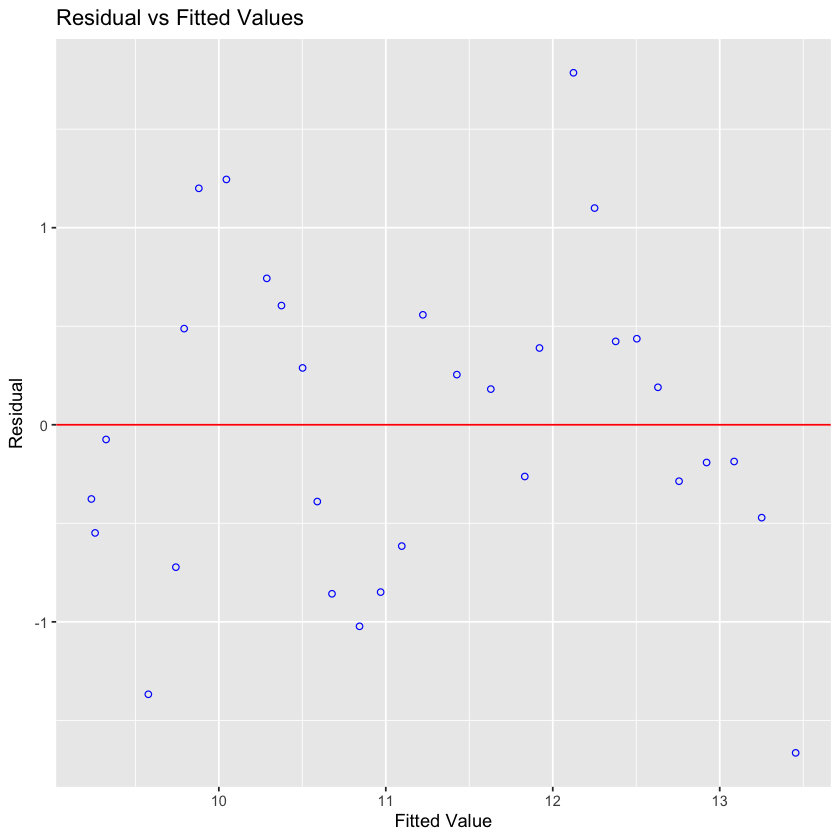

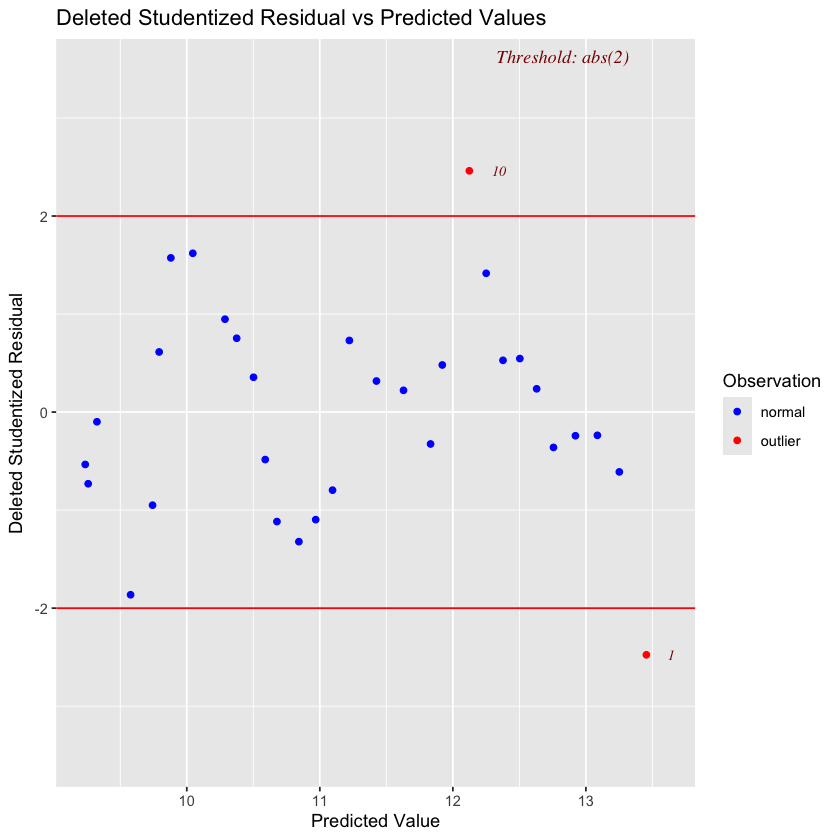

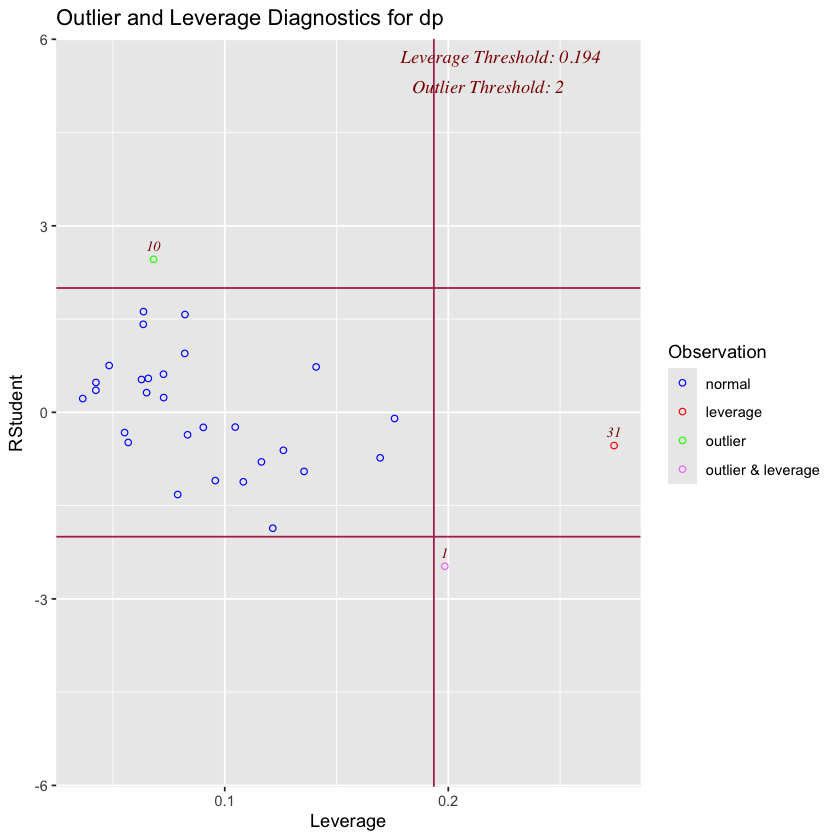

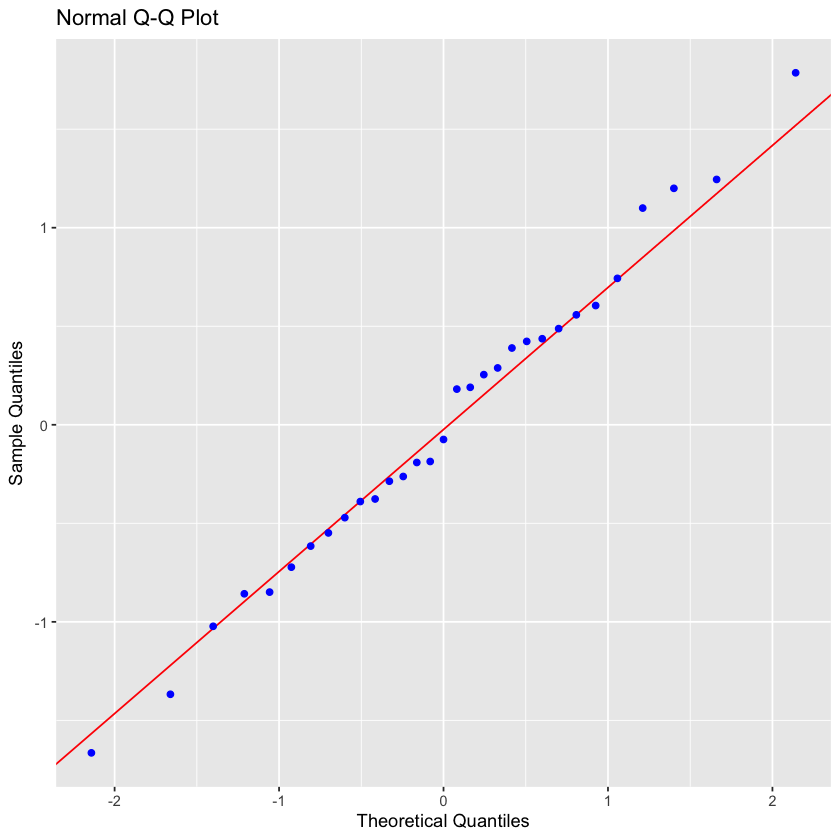

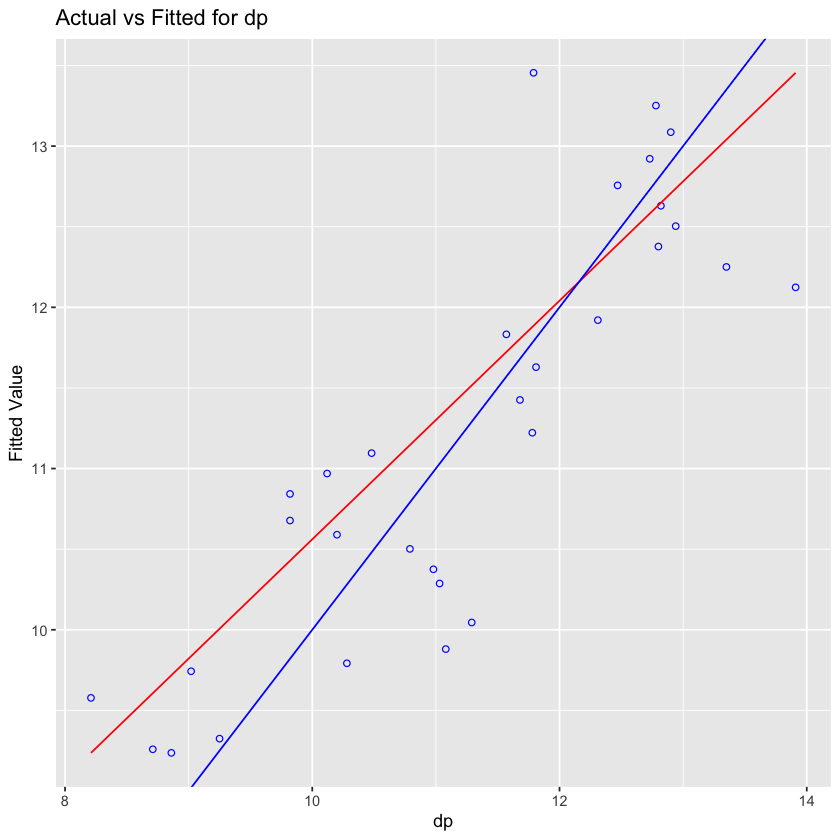

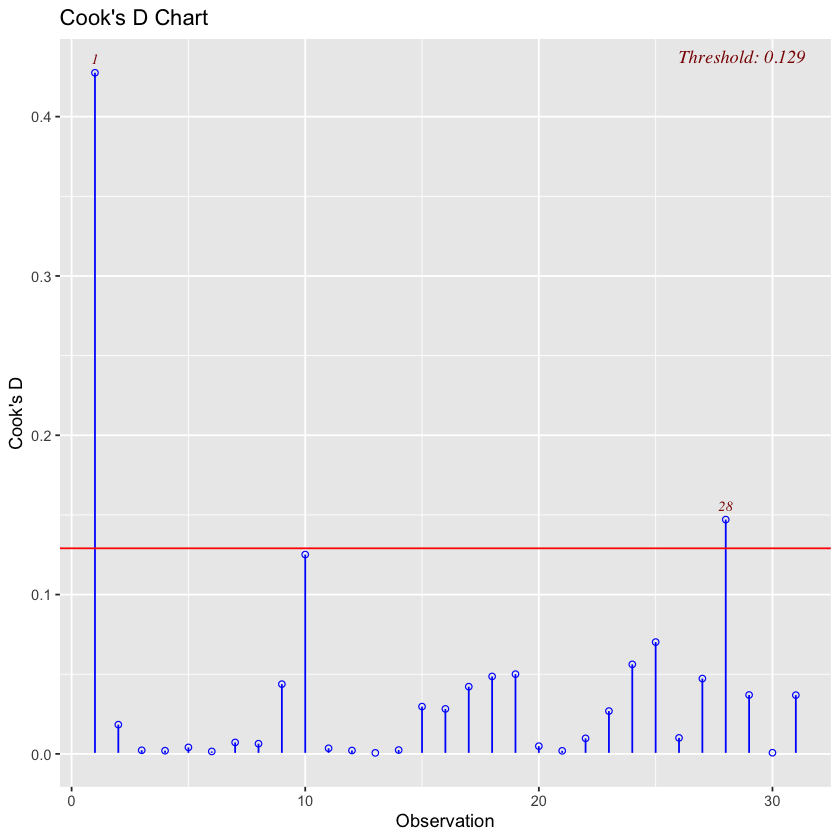

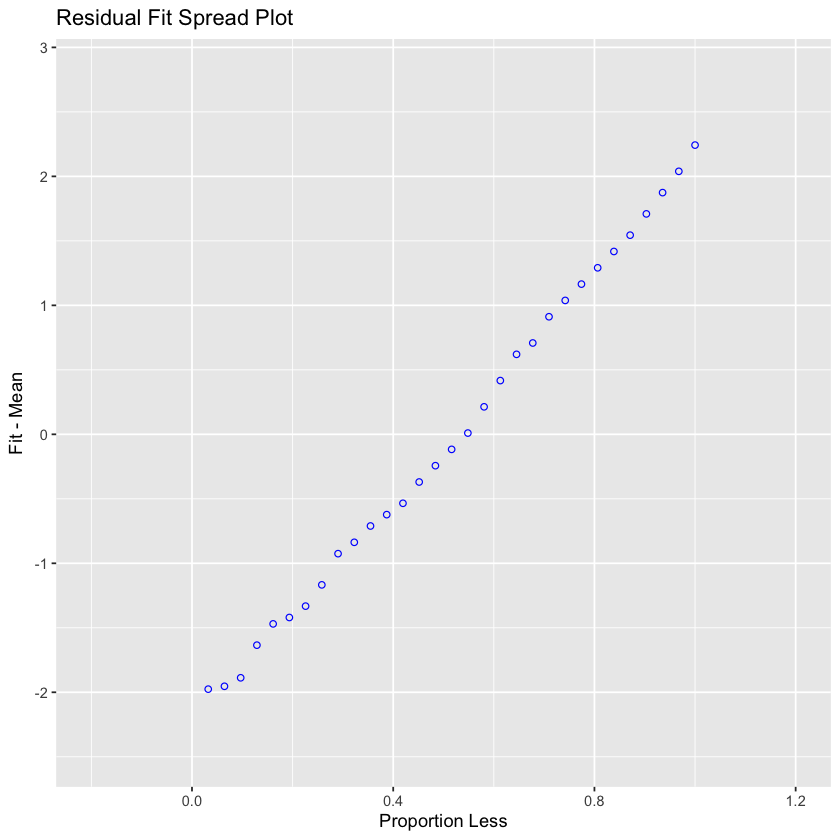

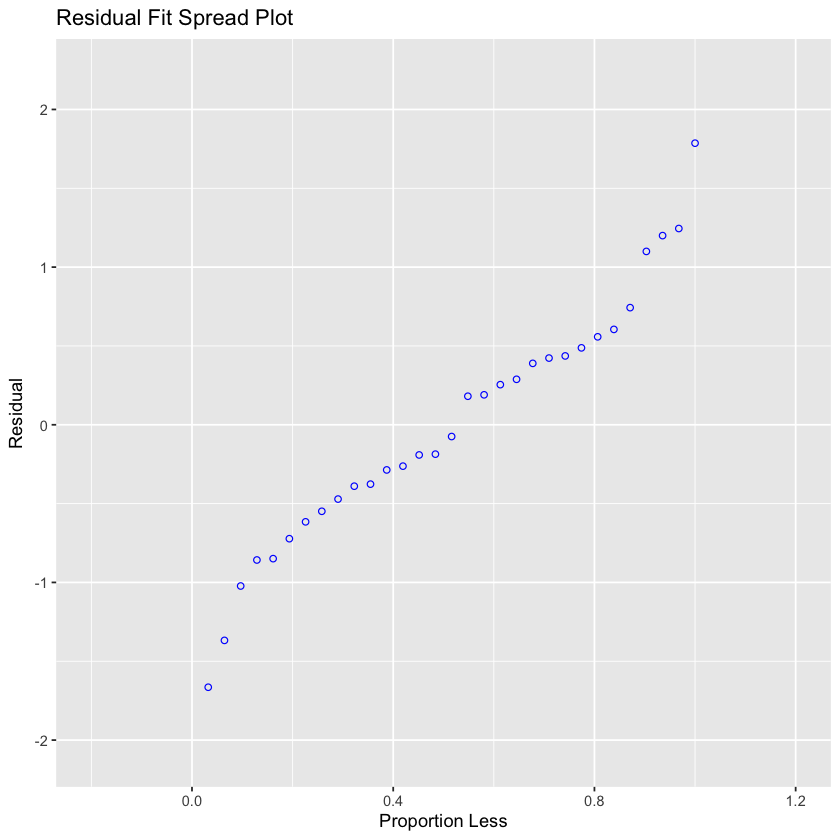

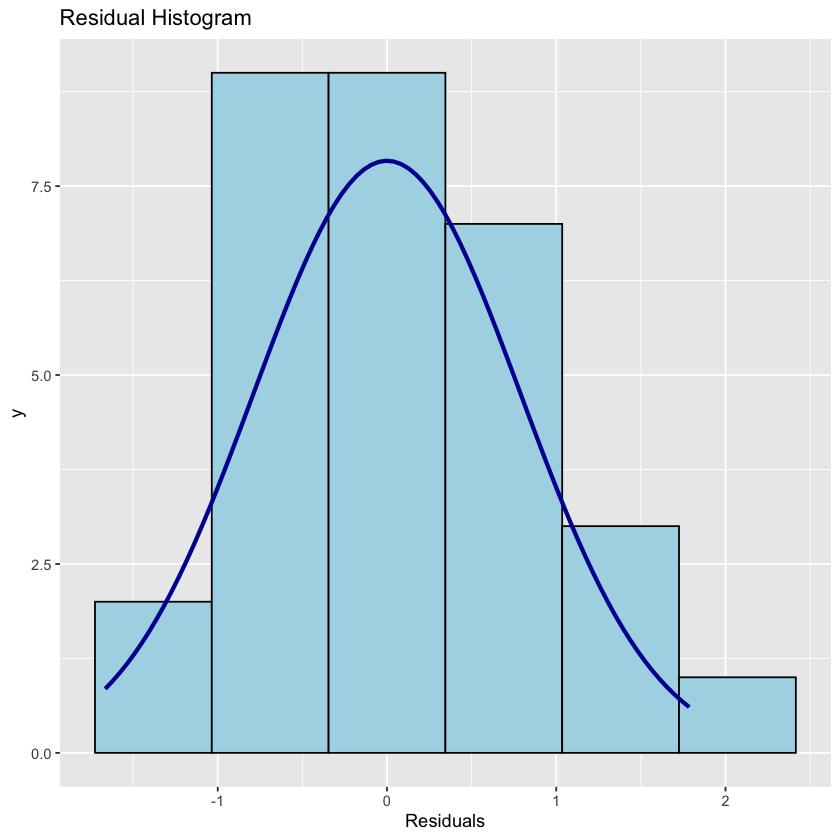

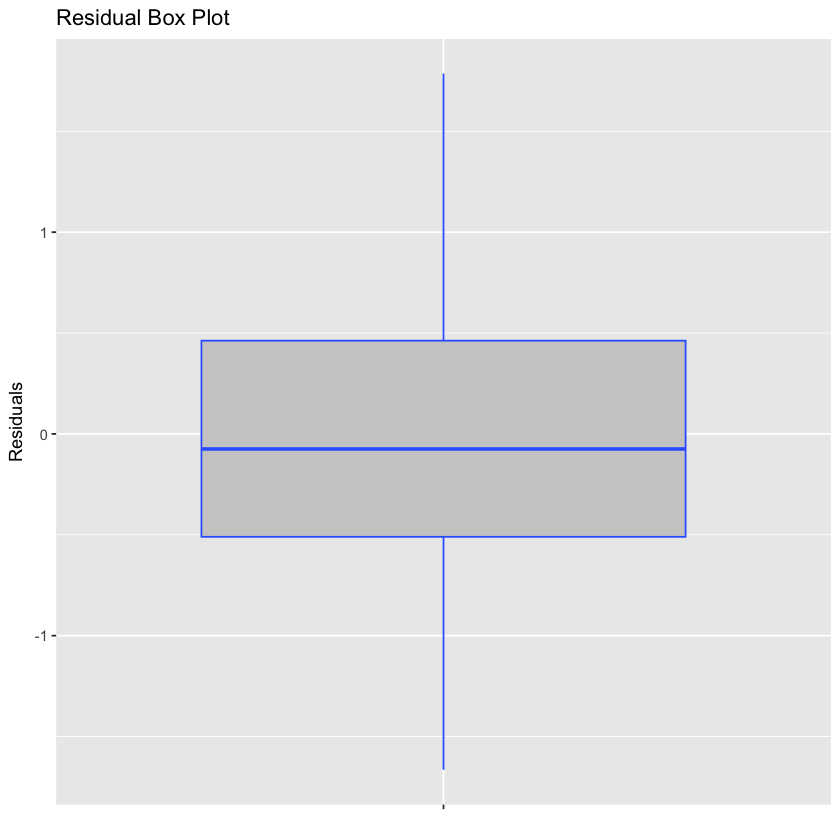

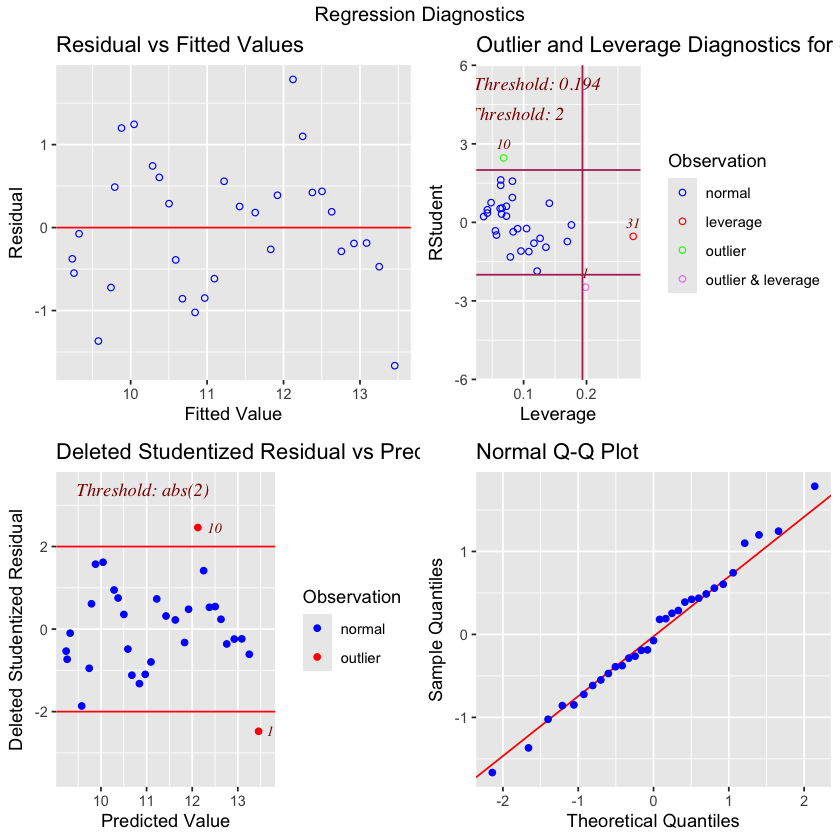

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


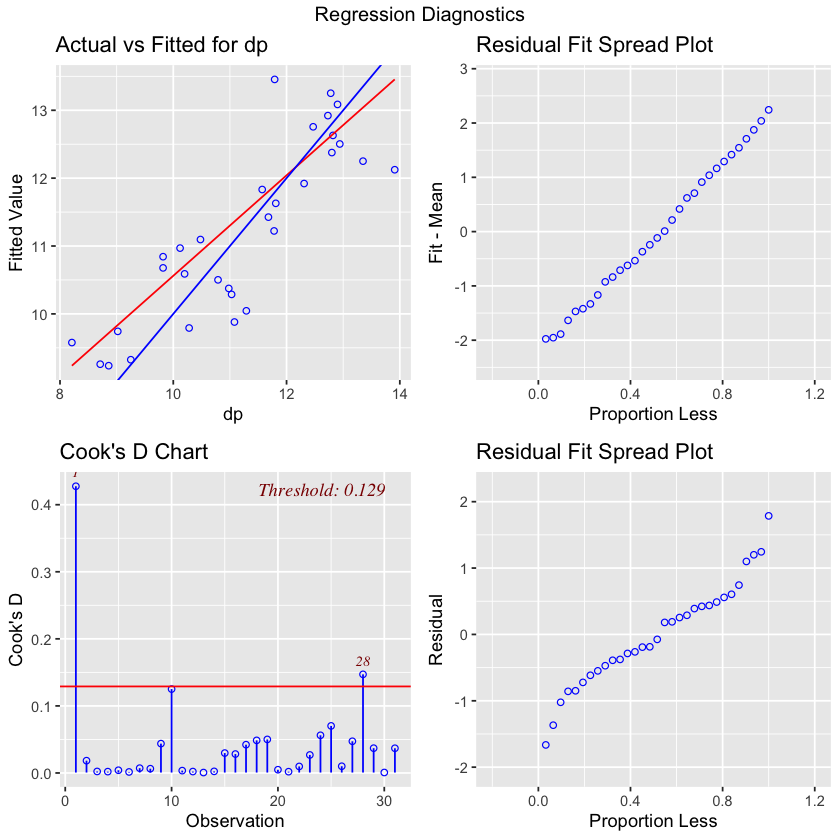

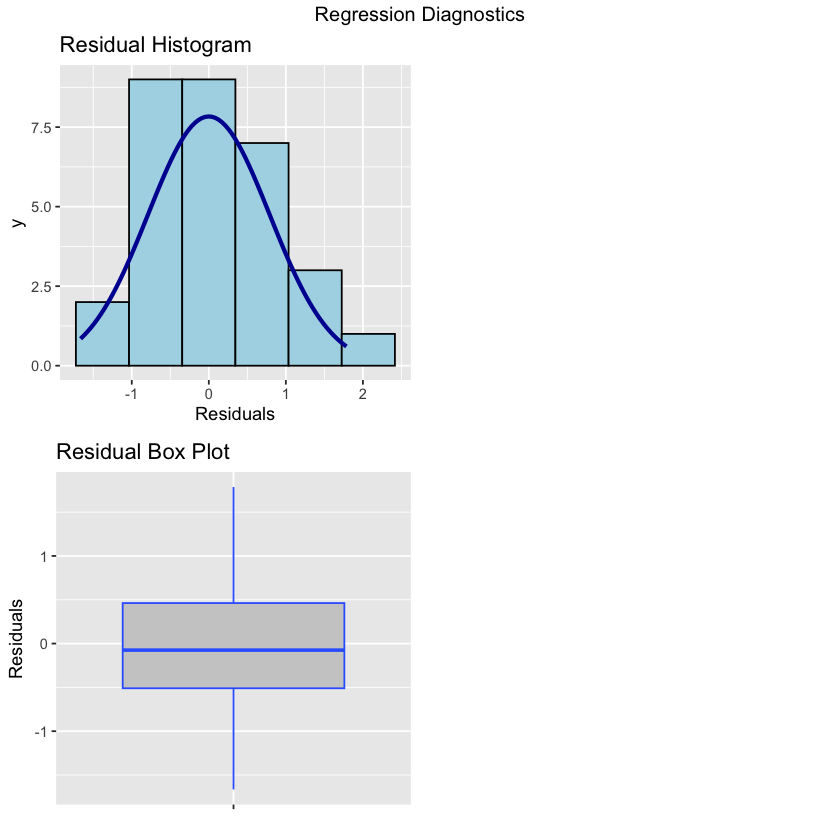

In [165]:
library(olsrr)

ols_plot_diagnostics(men_model)

From this output, we only see around 2 outliers, and this is backed up by the fact that there are only two points with high Cook's distance values above the common threshold.

##### **Task 5**

##### **The DFBETAS values can be plotted with the `ols_plot_dfbetas()` function from the olsrr package. Does your expectation from the last task prove correct? (Hint: What interval should the value of DFBETAS lie within?)**

[[1]]
NULL


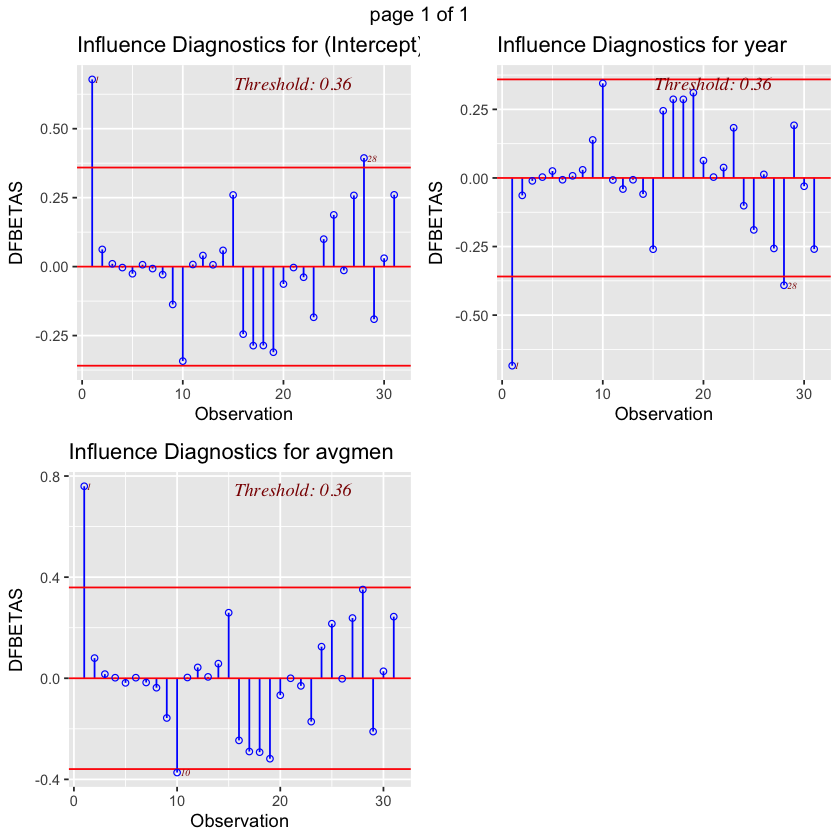

In [166]:
ols_plot_dfbetas(men_model)

The DFBETAS plots show that most observations fall within the acceptable range, indicating that they have little individual influence on the model coefficients.

However, there are around two observations that exceed this threshold (visible as points breaking the red boundary lines).

These are the same data points previously identified as potential outliers or high-leverage cases in the diagnostic plots, confirming the earlier suspicion that they exert notable influence on the model estimates.

The remaining observations have minimal effect on the parameter estimation.

(NOTE TASK 4 AND 5 HAS ONLY BEEN DONE ON MEN MODEL).

### **Exercise 5.1**

<img src="SymPyBilleder/2025-11-10-10-03-18.png" width="550">

##### **1.**

We know that hotellings $T^2$ formula is given as (from slide 61):
$$
T^2 = n(\bar{X} - \mu)^T S^{-1} (\bar{X} - \mu)
$$
Or we also look at slide 64 formula along with slide 63 for calculation rules. WE CAN ANSWER as the following, again we use:
$$
T^2=\frac{n_X n_Y}{n_X+n_Y};(\bar X-\bar Y)^\top S^{-1}(\bar X-\bar Y),
$$
Where the pooled covariance is
$$
S=\frac{(n_X-1)S_X+(n_Y-1)S_Y}{n_X+n_Y-2}.
$$

We compute the $S$ $(n_X-1)=(n_Y-1)=9$ so:
$$
S=\frac{9S_X+9S_Y}{18}=\frac{S_X+S_Y}{2}
=\frac{1}{2}\begin{pmatrix}6+4 & -2+2\\ -2+2 & 6+4\end{pmatrix}

=\begin{pmatrix}5& 0 \\ 0 & 5\end{pmatrix}=5I_2.
$$

Then the mean difference and $T^2$:
$$
d=\bar X-\bar Y=\begin{pmatrix} -3 \\ -2\end{pmatrix}
$$
 
$$
S^{-1}=\frac{1}{5}I_2,\quad d^\top S^{-1} d=\frac{1}{5}(9+4)=\frac{13}{5}=2.6.
$$
Factor $\dfrac{n_X n_Y}{n_X+n_Y}=\dfrac{10\cdot10}{20}=5$. Hence:
$$
T^2 = 5\times 2.6 = 13.
$$


##### **2.**

NOW to convert to an F statistic and get p-value where the conversion (two-sample case, pooled) is:
$$
F=\frac{(n_X+n_Y-p-1)}{p(n_X+n_Y-2)}T^2,
$$
With $F\sim F_{p,n_X+n_Y-p-1}$. NOW WE Plug numbers $n_X+n_Y=20,\ p=2$ AND GET:
$$
F=\frac{20-2-1}{2(20-2)}\cdot 13=\frac{17}{36}\cdot 13\approx 6.1388889,
$$
So degrees $(2,17)$. Next, using the $F(2,17)$ upper tail:
$$
\text{p-value} = P(F_{2,17} \ge 6.1389)\approx 0.00985.
$$

So the answer is $p \approx 0.00985$ (two-sided test for $\bar X=\bar Y$ in multivariate sense).

To interpret this, with $p \approx 0.00985$ we reject the null of equal mean vectors at the 1% level - the observed difference is statistically significant.

SLIDES REFERENCES: lecture J (week 10) contains the one- and two-sample Hotelling example and the R code showing the same formulas. Lecture G (discriminant and 2-sample theory) shows the two-sample $T^2$ formula and the F conversion. 


# **Week 10 in R code**

In [167]:
# Slide 4:

lbw <- read.delim("../data/lbw.txt")
by(lbw$bwt, lbw$race, summary)

lbw$race: black
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1135    2370    2849    2720    3057    3860 
------------------------------------------------------------ 
lbw$race: other
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    709    2313    2835    2804    3274    4054 
------------------------------------------------------------ 
lbw$race: white
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1021    2585    3076    3103    3651    4990 

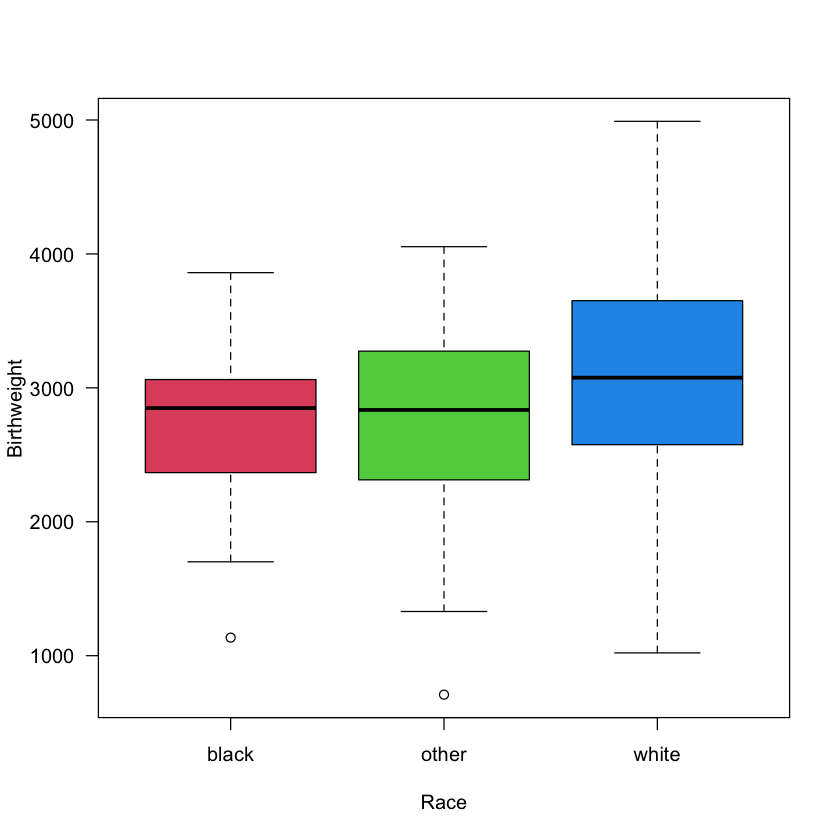

In [168]:
# Slide 5: 

boxplot(bwt ~ race, data = lbw, xlab = 'Race', ylab = 'Birthweight',
las = 1, col = 2:4)

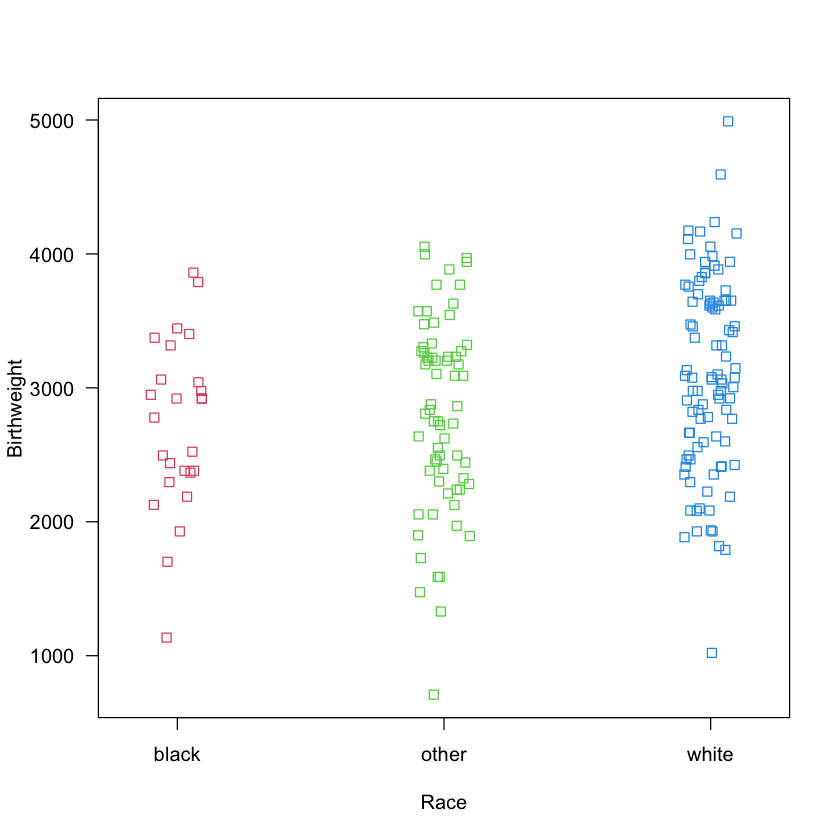

In [169]:
# Slide 8:

stripchart(bwt ~ race, data = lbw, vertical = TRUE, xlab = "Race",
ylab = "Birthweight", method = "jitter", las = 1, col = 2:4)

In [170]:
# Slide 10:

model1<-lm(bwt ~ race, data = lbw)
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
race,2,5048361,2524180.5,4.949012,0.008052094
Residuals,186,94866938,510037.3,NA,NA


In [171]:
# Slide 11:

model2<-lm(bwt ~ 1, data = lbw)
anova(model2,model1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,188,99915299,NA,NA,NA,NA
2,186,94866938,2,5048361,4.949012,0.008052094


In [172]:
# Slide 13:

summary(model1)


Call:
lm(formula = bwt ~ race, data = lbw)

Residuals:
     Min       1Q   Median       3Q      Max 
-2095.01  -503.01   -13.01   526.99  1886.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2719.69     140.06  19.418   <2e-16 ***
raceother      84.32     165.01   0.511   0.6100    
racewhite     383.32     157.89   2.428   0.0161 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 714.2 on 186 degrees of freedom
Multiple R-squared:  0.05053,	Adjusted R-squared:  0.04032 
F-statistic: 4.949 on 2 and 186 DF,  p-value: 0.008052


In [173]:
# Slide 14:

tab <- cbind(coef(summary(model1))[ , 1:2], "Lower" = confint(model1)[ , 1],
             "Upper" = confint(model1)[ , 2])
data.frame(round(tab, 2),
           "p-value" = format.pval(coef(summary(model1))[ , 4], 
           digits = 3, eps = 1e-3))

,Estimate,Std..Error,Lower,Upper,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),2719.69,140.06,2443.38,2996.00,<0.001
raceother,84.32,165.01,-241.22,409.86,0.6100
racewhite,383.32,157.89,71.83,694.81,0.0161


In [174]:
# slide 15:

model1a<-lm(bwt ~ race-1, data = lbw)

tab <- cbind(coef(summary(model1a))[ , 1:2], "Lower" = confint(model1a)[ , 1],
             "Upper" = confint(model1a)[ , 2])
data.frame(round(tab, 2))

,Estimate,Std..Error,Lower,Upper
,<dbl>,<dbl>,<dbl>,<dbl>
raceblack,2719.69,140.06,2443.38,2996.00
raceother,2804.01,87.25,2631.89,2976.14
racewhite,3103.01,72.89,2959.21,3246.81


In [175]:
# # Slide 17:

# # install.packages("MESS")
# qqwrap <- function(x, y, ...) {qqnorm(y,main="",...)
# abline(a=0, b=1)}

# set.seed(2383)
# wallyplot(model1, FUN=qqwrap)

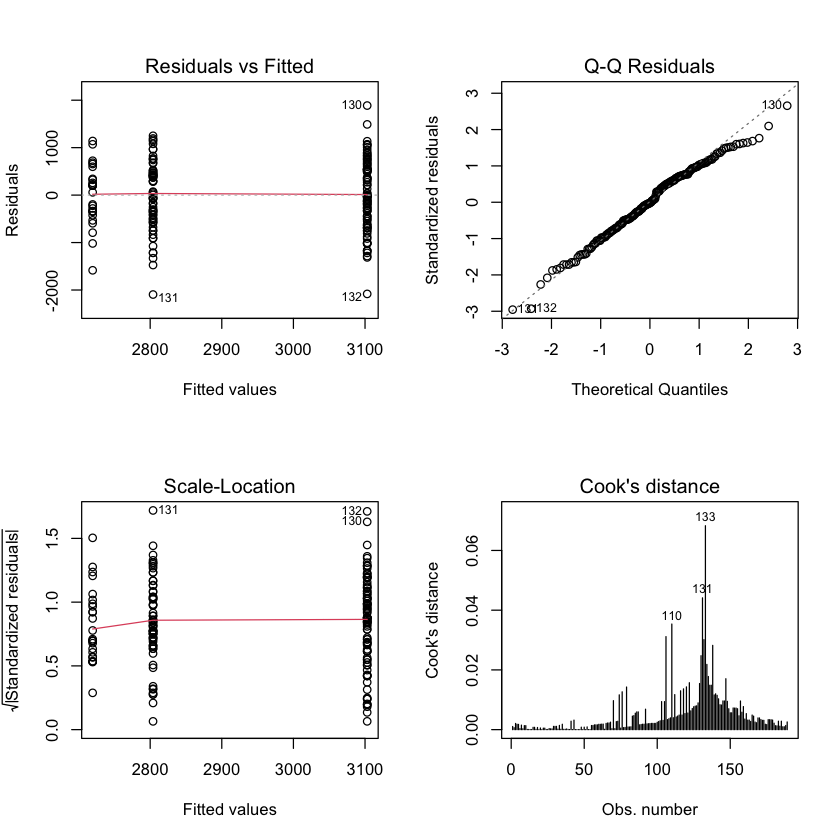

In [176]:
# slide 18:

par(mfrow=c(2,2))
plot(model1,which=1:4)
par(mfrow=c(1,1))

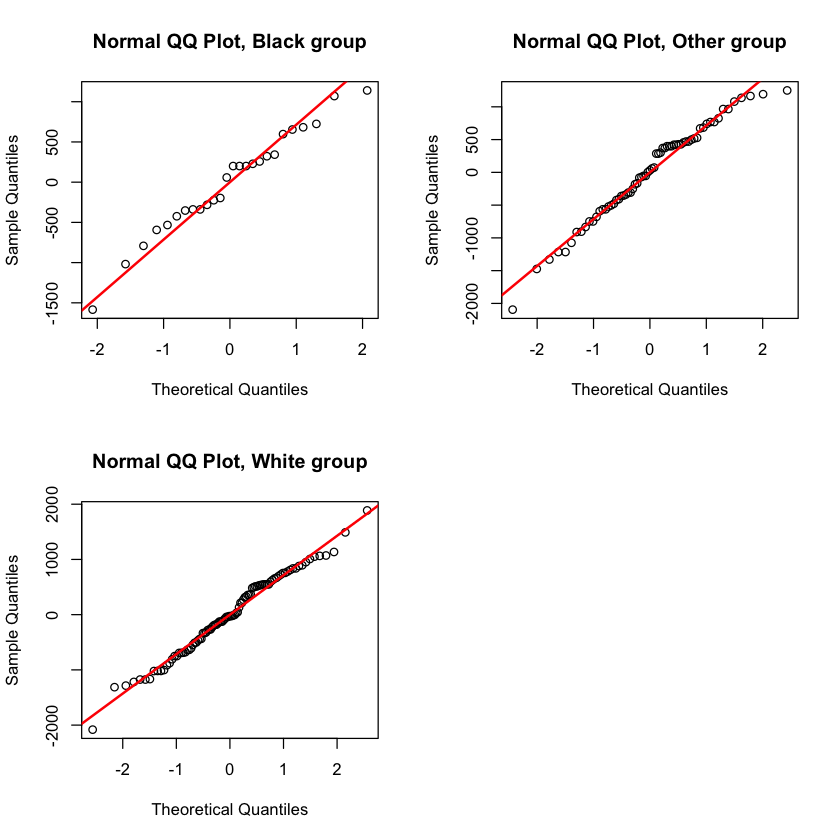

In [177]:
# slide 19:
par(mfrow=c(2,2))
qqnorm(model1$res[lbw$race=="black"],main="Normal QQ Plot, Black group")
abline(a=0, b=summary(model1)$sigma,col="red",lwd=2)
qqnorm(model1$res[lbw$race=="other"],main="Normal QQ Plot, Other group")
abline(a=0, b=summary(model1)$sigma,col="red",lwd=2)
qqnorm(model1$res[lbw$race=="white"],main="Normal QQ Plot, White group")
abline(a=0, b=summary(model1)$sigma,col="red",lwd=2)
par(mfrow=c(1,1))

In [178]:
# Slide 22:
bartlett.test(bwt~race,data=lbw)

# Slide 24:

pairwise.t.test(lbw$bwt, lbw$race, p.adj = "none")

# slide 25:

pairwise.t.test(lbw$bwt, lbw$race, p.adj = "bonferroni")


	Bartlett test of homogeneity of variances

data:  bwt by race
Bartlett's K-squared = 0.65601, df = 2, p-value = 0.7204



	Pairwise comparisons using t tests with pooled SD 

data:  lbw$bwt and lbw$race 

      black  other 
other 0.6100 -     
white 0.0161 0.0093

P value adjustment method: none 


	Pairwise comparisons using t tests with pooled SD 

data:  lbw$bwt and lbw$race 

      black other
other 1.000 -    
white 0.048 0.028

P value adjustment method: bonferroni 

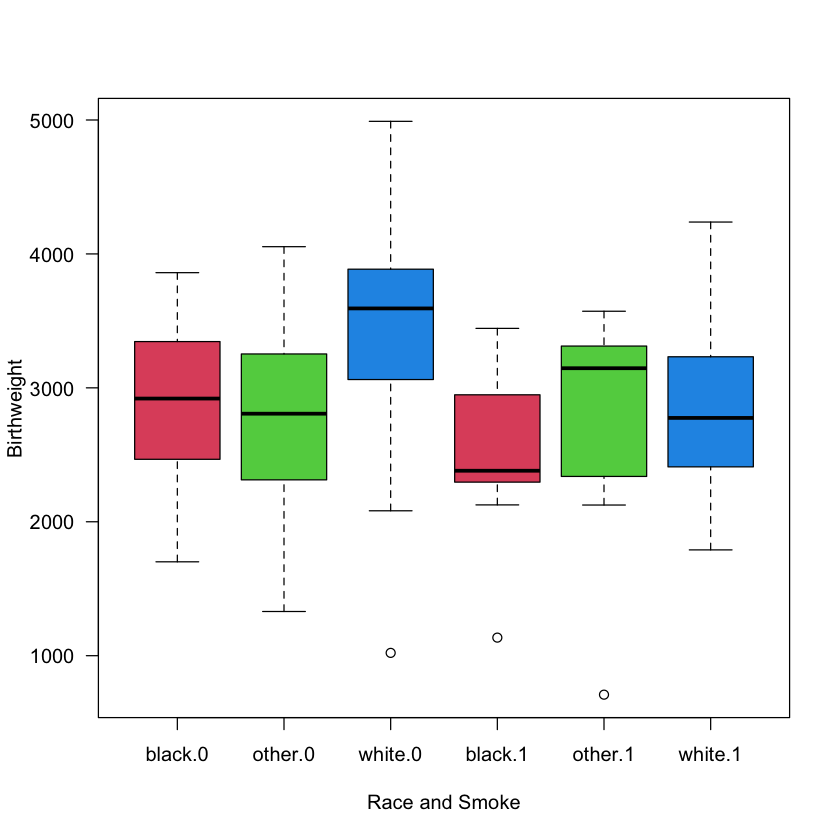

In [179]:
# Slide 26:

boxplot(bwt ~ race*smoke, data=lbw, xlab = 'Race and Smoke',
ylab = 'Birthweight', las = 1, col = 2:4)

# Slide 27:
lbw$smoke <- as.factor(lbw$smoke)
model1 <- lm(bwt ~ race + smoke + race:smoke, data = lbw)


	Bartlett test of homogeneity of variances

data:  bwt by group
Bartlett's K-squared = 2.0061, df = 5, p-value = 0.8483


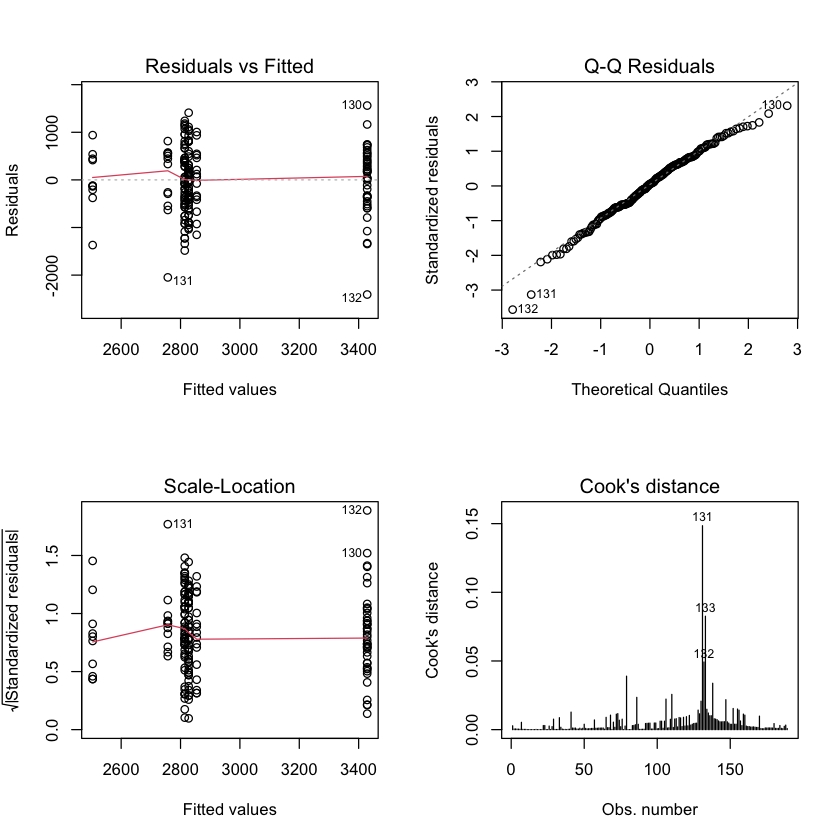

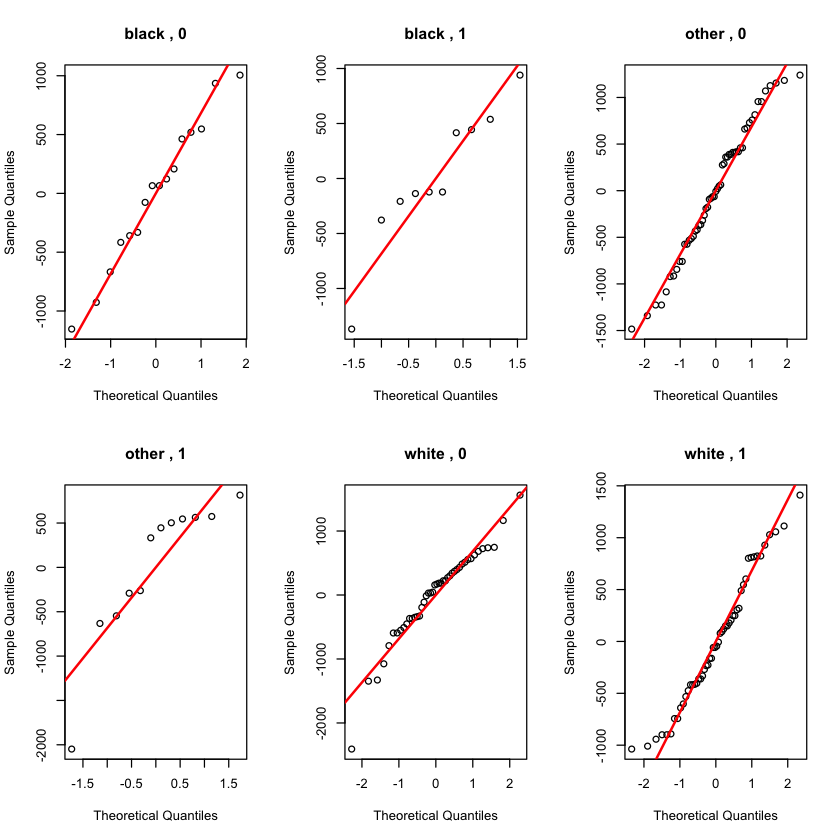

In [180]:
# Slide 28:

par(mfrow=c(2,2))
plot(model1,which=1:4)

lbw2<-lbw; lbw2$group<-paste(lbw$race,",",lbw$smoke)
bartlett.test(bwt ~ group, data=lbw2)

par(mfrow=c(2,3))
for( i in levels(as.factor(lbw2$group))){
  qqnorm(model1$res[lbw2$group==i],main=i)
  abline(a=0,b=summary(model1)$sigma,lwd=2,col="red")
  }
par(mfrow=c(1,1))

In [181]:
# Slide 31:

summary(model1)

# Slide 33:

model1a <- lm(bwt ~ race:smoke-1, data = lbw)
summary(model1a)

# Slide 37:

drop1(model1,test="F")

model2<-update(model1,~.-race:smoke)
drop1(model2,test="F")


Call:
lm(formula = bwt ~ race + smoke + race:smoke, data = lbw)

Residuals:
     Min       1Q   Median       3Q      Max 
-2407.75  -417.38    31.25   462.50  1561.25 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2854.50     170.84  16.708  < 2e-16 ***
raceother          -40.26     194.11  -0.207  0.83591    
racewhite          574.25     199.50   2.878  0.00447 ** 
smoke1            -350.50     275.47  -1.272  0.20486    
raceother:smoke1   293.43     351.13   0.836  0.40443    
racewhite:smoke1  -250.87     309.00  -0.812  0.41792    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 683.4 on 183 degrees of freedom
Multiple R-squared:  0.1447,	Adjusted R-squared:  0.1213 
F-statistic: 6.191 on 5 and 183 DF,  p-value: 2.505e-05



Call:
lm(formula = bwt ~ race:smoke - 1, data = lbw)

Residuals:
     Min       1Q   Median       3Q      Max 
-2407.75  -417.38    31.25   462.50  1561.25 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
raceblack:smoke0  2854.50     170.84   16.71   <2e-16 ***
raceother:smoke0  2814.24      92.15   30.54   <2e-16 ***
racewhite:smoke0  3428.75     103.02   33.28   <2e-16 ***
raceblack:smoke1  2504.00     216.10   11.59   <2e-16 ***
raceother:smoke1  2757.17     197.27   13.98   <2e-16 ***
racewhite:smoke1  2827.38      94.77   29.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 683.4 on 183 degrees of freedom
Multiple R-squared:  0.9508,	Adjusted R-squared:  0.9492 
F-statistic: 589.9 on 6 and 183 DF,  p-value: < 2.2e-16


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,85459758,2473.122,NA,NA
race:smoke,2,2108643,87568401,2473.729,2.25768,0.1074986


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,87568401,2473.729,NA,NA
race,2,8749453,96317854,2487.728,9.242197,0.0001493679
smoke,1,7298537,94866938,2486.859,15.419138,0.0001214218


In [182]:
# Slide 38:

tab <- cbind(coef(summary(model2))[ , 1:2], "Lower" = confint(model1)[ , 1],
             "Upper" = confint(model2)[ , 2])
data.frame(round(tab, 2),
           "p-value" = format.pval(coef(summary(model2))[ , 4], 
           digits = 3, eps = 1e-3))

Warning message in cbind(coef(summary(model2))[, 1:2], Lower = confint(model1)[, :
“number of rows of result is not a multiple of vector length (arg 2)”


,Estimate,Std..Error,Lower,Upper,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),2884.32,141.29,2517.43,3163.07,< 0.001
raceother,-3.64,160.54,-423.24,313.08,0.98193
racewhite,450.54,153.07,180.63,752.52,0.00366
smoke1,-428.03,109.00,-894.02,-212.98,< 0.001


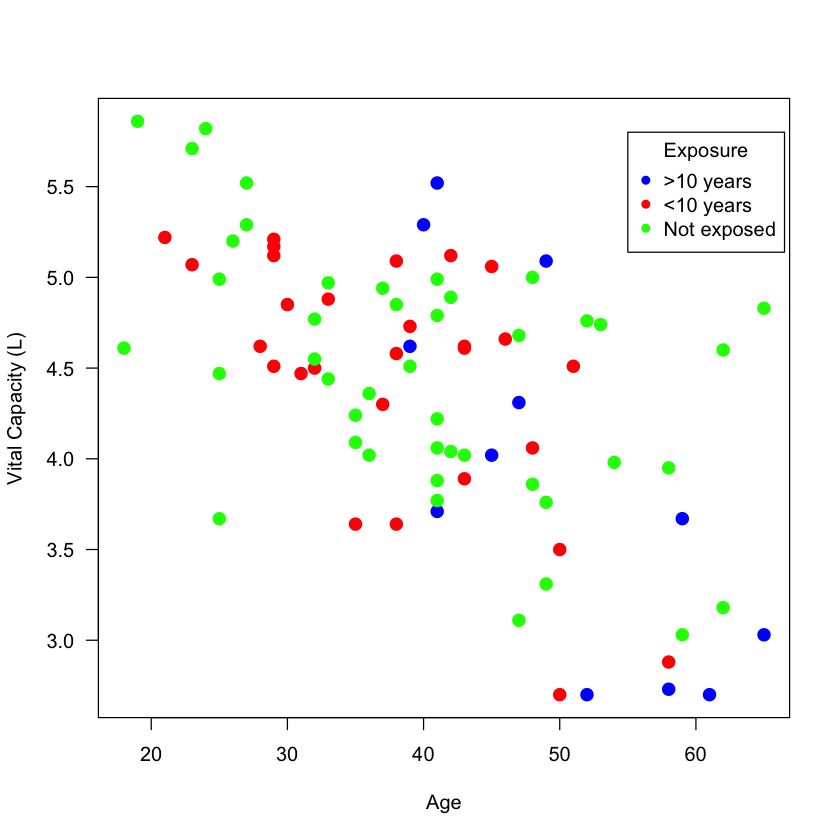

In [183]:
# Slide 40:
CADdata <- read.csv("../data/cadmium.txt", sep="")
CADdata$group <- as.factor(CADdata$group)

plot(CADdata$age, CADdata$vitcap,
col = c("blue","red","green")[CADdata$group],
xlab = "Age", ylab = "Vital Capacity (L)",
las = 1, cex = 1.5, pch = c(16,16,16))
legend(55,5.8, c(">10 years","<10 years", "Not exposed"),
col = c("blue","red","green"),
pch = c(16,16,16), title = "Exposure")

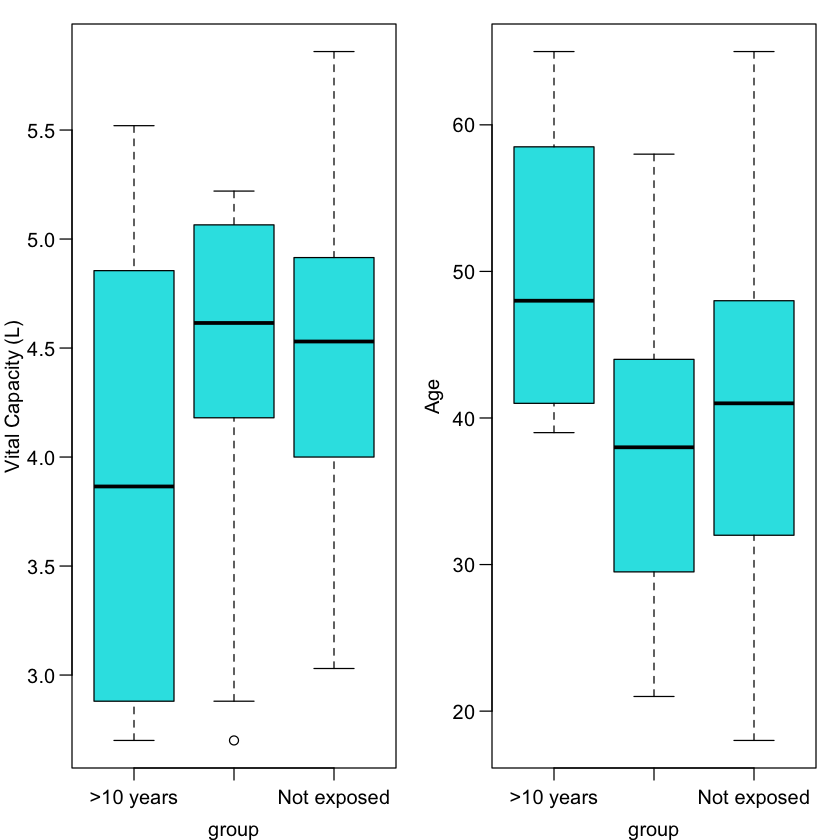

In [184]:
# Slide 41:
par(mfrow = c(1,2), mgp = c(2,0.7,0), mar = c(3,3,1,1))
boxplot(vitcap ~ group, data = CADdata, ylab = 'Vital Capacity (L)',
las = 1, xaxt = "n", col = 5)
axis(1, at = c(1,2,3),
labels = c(">10 years","<10 years", "Not exposed"))
boxplot(age ~ group, data = CADdata ,ylab = 'Age',
las = 1, xaxt = "n", col = 5)
axis(1, at = c(1,2,3),
labels = c(">10 years", "<10 years", "Not exposed"))
par(mfrow = c(1,1))

In [185]:
# Slide 45:
CADdata$expo[CADdata$group==3] <- 1
CADdata$expo[CADdata$group==2] <- 2
CADdata$expo[CADdata$group==1] <- 3

CADdata$expo<-as.factor(CADdata$expo)

model1<-lm(vitcap ~ expo + age, data = CADdata)

ERROR: Error in wallyplot(model1): could not find function "wallyplot"


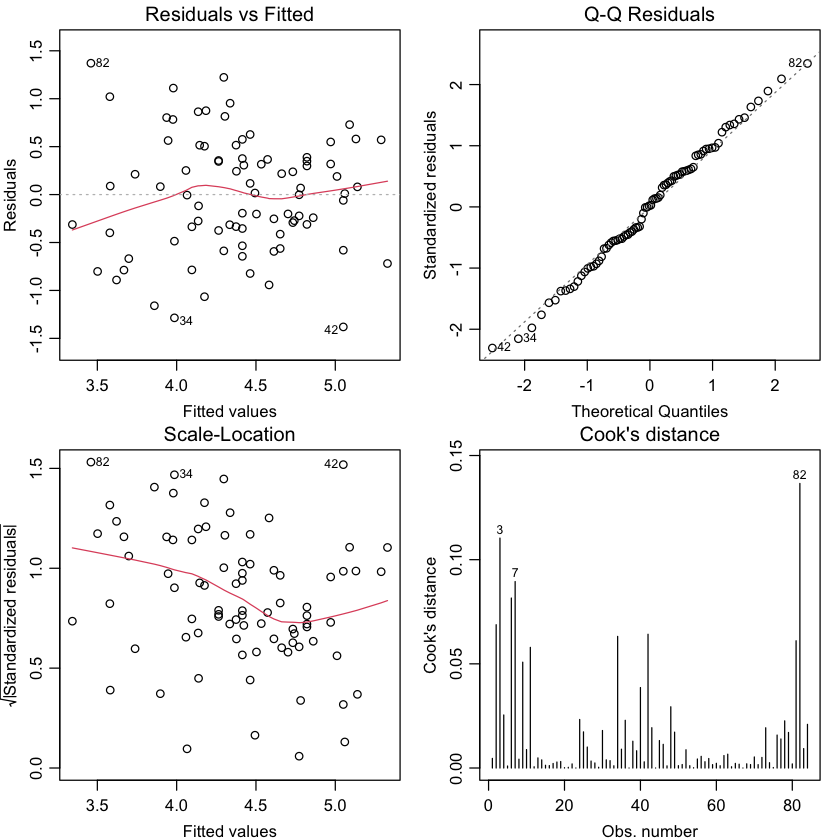

In [186]:
# Slide 46:

par(mfrow = c(2,2), mgp = c(2,0.7,0), mar = c(3,3,1.5,1))
plot(model1, which = 1:4)
par(mfrow = c(1,1))


# Slide 47:

set.seed(3447)
wallyplot(model1)

Warning message:
“package ‘car’ was built under R version 4.3.3”
Loading required package: carData



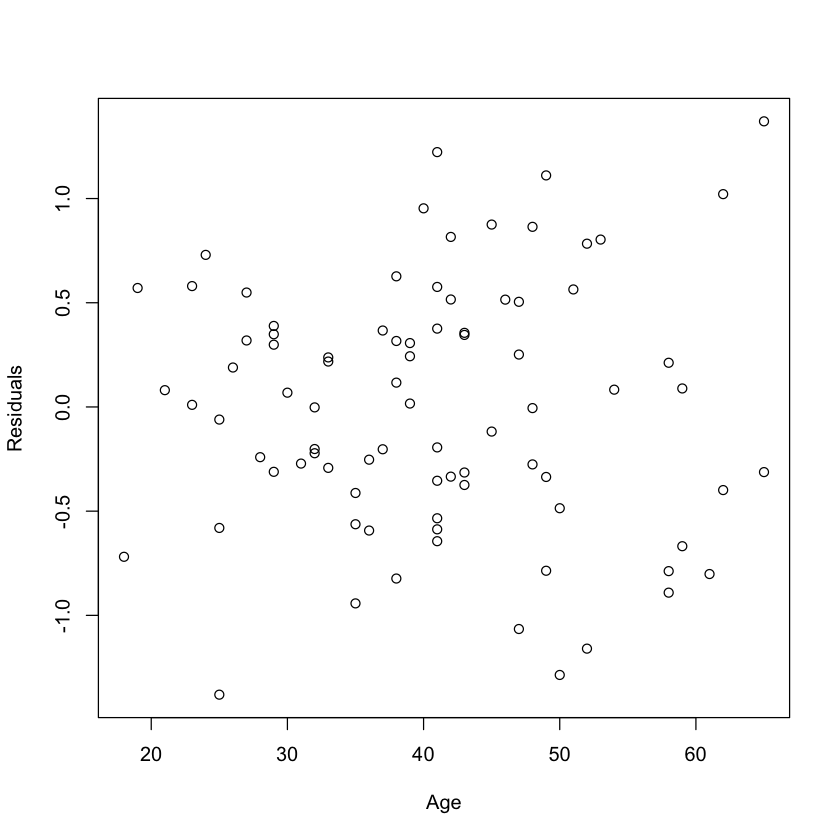

           Test stat Pr(>|Test stat|)
expo                                 
age          -0.0535           0.9575
Tukey test   -0.3918           0.6952



Call:
lm(formula = vitcap ~ expo + age, data = CADdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.38054 -0.38050  0.01321  0.37909  1.37047 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.044917   0.268025  22.554  < 2e-16 ***
expo2       -0.070198   0.148669  -0.472    0.638    
expo3       -0.116935   0.209236  -0.559    0.578    
age         -0.039775   0.006322  -6.291 1.57e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6127 on 80 degrees of freedom
Multiple R-squared:  0.3696,	Adjusted R-squared:  0.3459 
F-statistic: 15.63 on 3 and 80 DF,  p-value: 4.323e-08


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,30.03467,-78.39101,NA,NA
expo,2,0.1616986,30.19637,-81.93999,0.2153493,8.067256e-01
age,1,14.8589475,44.89362,-46.62778,39.5781197,1.572311e-08


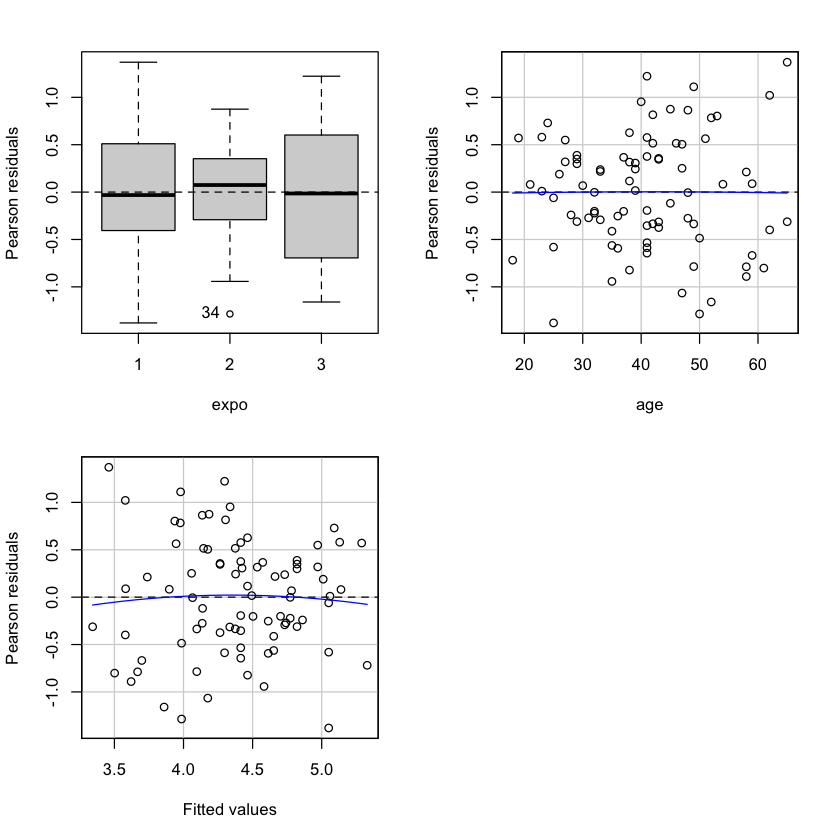

In [ ]:
# Slide 48:
plot(CADdata$age, model1$residuals, xlab = 'Age',
ylab = 'Residuals')

# Slide 49:
library(car)
residualPlots(model1)

# Slide 50:
summary(model1)
drop1(model1,test="F")

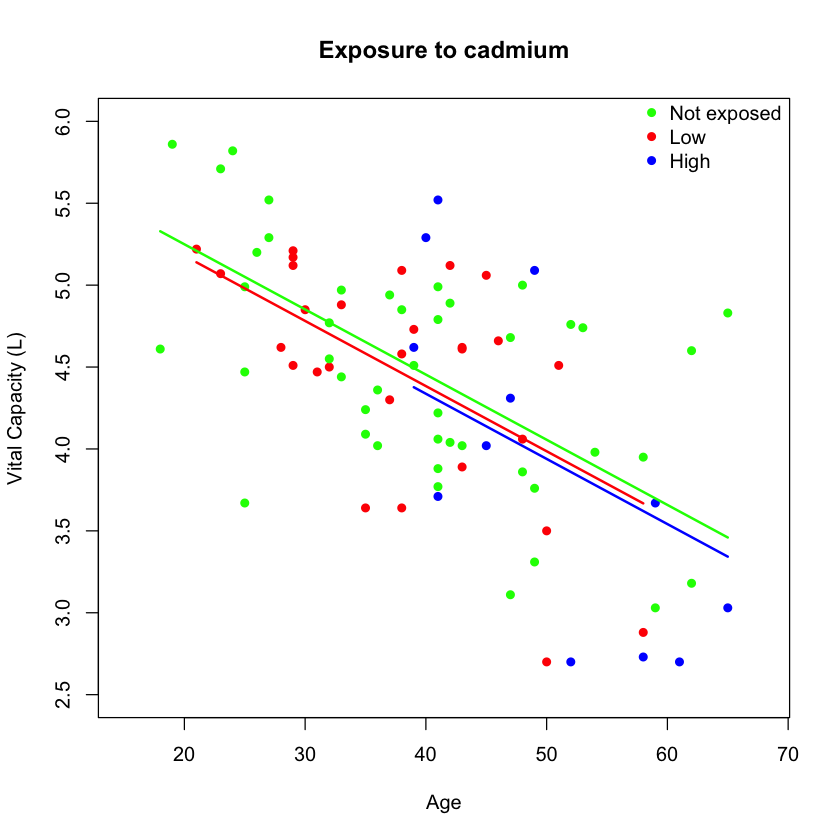

In [ ]:
# Slide 51:

my.coef <- coef(model1)

par(mfrow=c(1,1))
plot(CADdata$age, CADdata$vitcap, col=c("green","red","blue")[CADdata$expo],
     xlab = "Age", 
     ylab = "Vital Capacity (L)",xlim=c(15,68), ylim=c(2.5,6), 
     pch=c(16,16,16), main = "Exposure to cadmium")

legend(57.2,6.2, c("Not exposed","Low","High" ),
       col=c("green","red","blue"), pch = c(16,16,16),bty="n")

# plot line for first group, expo=1
lines(18:65, my.coef[1] + my.coef[4]*(18:65), col="green", type="l",lwd=2)
# plot line for second group, expo=2
lines(21:58, my.coef[1] + my.coef[2]+ my.coef[4]*(21:58), col="red", type="l", lwd=2)
# plot line for third group, expo=3
lines(39:65, my.coef[1] + my.coef[3] + my.coef[4]*(39:65), col="blue", type="l", lwd=2)


Call:
lm(formula = vitcap ~ age + expo + age:expo, data = CADdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24497 -0.36929  0.01977  0.43681  1.13953 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.680291   0.313426  18.123  < 2e-16 ***
age         -0.030613   0.007547  -4.056 0.000117 ***
expo2        0.549740   0.575884   0.955 0.342728    
expo3        2.503148   1.041842   2.403 0.018655 *  
age:expo2   -0.015919   0.014547  -1.094 0.277170    
age:expo3   -0.054498   0.021070  -2.587 0.011554 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5942 on 78 degrees of freedom
Multiple R-squared:  0.422,	Adjusted R-squared:  0.385 
F-statistic: 11.39 on 5 and 78 DF,  p-value: 2.871e-08


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,27.53521,-81.68950,NA,NA
age:expo,2,2.499458,30.03467,-78.39101,3.540153,0.03375646


expo1       expo2       expo3   expo1:age   expo2:age   expo3:age 
 5.68029060  6.23003098  8.18343838 -0.03061267 -0.04653201 -0.08511099

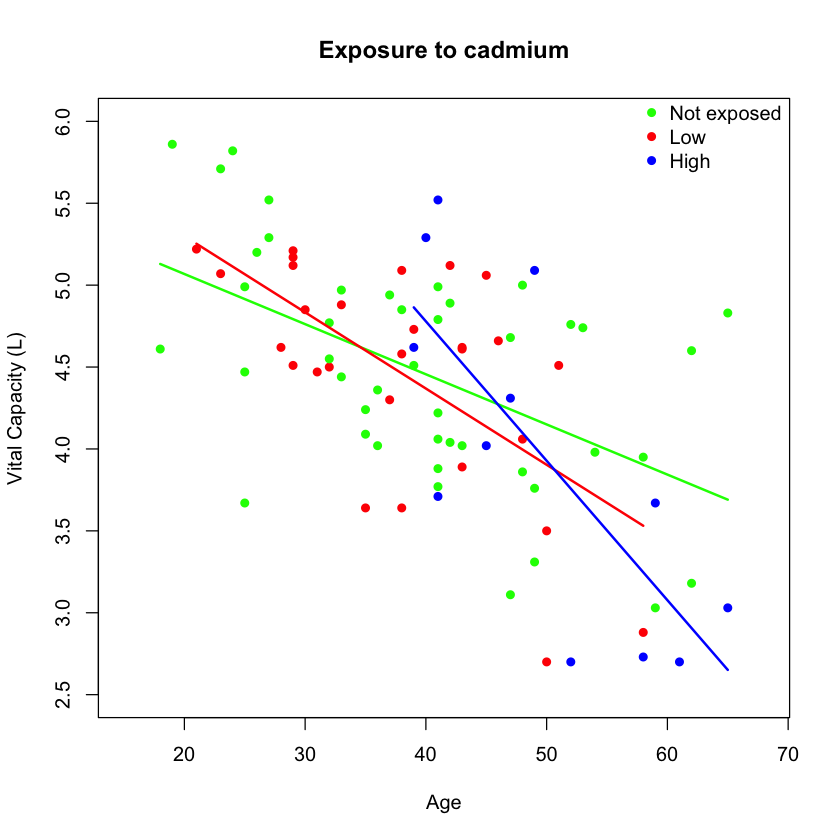

In [ ]:
# Slide 53:
model2 <- lm(vitcap ~ age + expo + age:expo, data = CADdata)
summary(model2)

drop1(model2, test = "F")

# Slide 54:
model2B<-lm(vitcap ~ 0 + expo + age:expo, data = CADdata)
my.coef <- coef(model2B)
my.coef

plot(CADdata$age, CADdata$vitcap, col=c("green","red","blue")[CADdata$expo],
     xlab = "Age", 
     ylab = "Vital Capacity (L)",xlim=c(15,68), ylim=c(2.5,6), pch=c(16,16,16), main = "Exposure to cadmium")

legend(57.2,6.2, c("Not exposed","Low","High" ),
       col=c("green","red","blue"), pch = c(16,16,16), bty="n" )

# plot line for first group, expo=1
lines(18:65, my.coef[1] + my.coef[4]*(18:65), col="green", type="l",lwd=2)
# plot line for second group, expo=2
lines(21:58, my.coef[2] + my.coef[5]*(21:58), col="red", type="l", lwd=2)
# plot line for first group, expo=3
lines(39:65, my.coef[3] + my.coef[6]*(39:65), col="blue", type="l", lwd=2)

In [ ]:
# Slide 65:

heatclimate<-read.table("../data/heatclimate.txt",header=T, sep=" ")
heatclimate$sex<-as.factor(heatclimate$sex)
summary(heatclimate)

 sex        height           evap            temp      
 f:16   Min.   :157.0   Min.   :12.60   Min.   :31.90  
 m:16   1st Qu.:166.2   1st Qu.:18.48   1st Qu.:33.20  
        Median :173.0   Median :20.75   Median :33.55  
        Mean   :172.9   Mean   :22.49   Mean   :33.52  
        3rd Qu.:180.0   3rd Qu.:25.65   3rd Qu.:33.90  
        Max.   :190.0   Max.   :45.40   Max.   :34.80  

In [ ]:
# Slide 66:
X<-as.matrix(heatclimate[heatclimate$sex=="f",3:4])
Y<-as.matrix(heatclimate[heatclimate$sex=="m",3:4])
n<-dim(X)[1]
m<-dim(Y)[1]
p<-dim(X)[2]
Xbar<-colMeans(X)
Ybar<-colMeans(Y)

Xbar2<-matrix(rep(Xbar,16),ncol=p,byrow=T)
Ybar2<-matrix(rep(Ybar,16),ncol=p,byrow=T)

S1<-t(X-Xbar2)%*%(X-Xbar2)/(n-1)
S2<-t(Y-Ybar2)%*%(Y-Ybar2)/(m-1)

S<-((n-1)*S1+(m-1)*S2)/(n+m-2)
S

,evap,temp
evap,45.5081250,-0.3004167
temp,-0.3004167,0.2985000


In [ ]:
# Slide 67:
T2<-(n*m/(n+m))*t(Xbar-Ybar)%*%solve(S)%*%(Xbar-Ybar)
T2
1-pf(T2,p,n+n-p+1)

4.612128


0.01764176
